In [1]:
# # from termcolor import colored
# # print(colored("hello ",'blue', attrs=['bold']))
# from termcolor import colored
# print(colored(" \n HELLO ! <----------  file are saved in .dat format ---------->  ",'blue', attrs=['bold']))

In [1]:
# import pandas as pd
# import numpy as np
# x= list(range(1,10))
# y=list(range(11,20))
# A= pd.DataFrame(x)
# piezo = pd.DataFrame(x)
# phi = pd.DataFrame(y)
# print("size of x and y : \t",A.shape,phi.shape)
# K = 2.56
# Q = 234
# R = 10*10E-9
# A0 = 11
# df4 = ((-3*K*A0)/(Q*R))*((A**2 )*np.cos(phi))*(((piezo+A)/A)**2 -1)**1.5   
# # df4 = np.cos(x)+np.sin(y)
# df4
# print("value in rad in degre  :",2*x/3)

In [2]:
# piezoa=piezo.set_axis(['Amplitude'],axis='columns')
# print(piezoa)
# data_endamp = piezoa.shape[0]
# print("rows",data_endamp)
# x = piezoa['Amplitude'][data_endamp-1]
# x

In [3]:
3**1.5

5.196152422706632

In [4]:
27**.5

5.196152422706632

In [5]:

# def add(num1 =x,Num2= None ):
#     num1 =x
#     Num2 =y
#     return num1+Num2 

# add(num1=x,Num2=None)

In [2]:
# import numpy as np
# # Sample data representing the change in y-values
# dy = np.array([0.1, 0.2, 0.05, 0.03, 0.002, 0.001, 0.0015, 0.0005, 0.0, -0.001, -0.003])
# print(dy)
# # Threshold for slope
# slope_threshold = 0.01
# # Find the index where the change in y-values becomes less than the threshold
# starting_point_index = np.where(np.abs(dy) < slope_threshold)
# print(starting_point_index)
# starting_point_index = np.where(np.abs(dy) < slope_threshold)[0][0]
# # Print the result
# print("Index of the starting point of flat region:", starting_point_index)

In [3]:
# import pandas as pd
# dataex1 = {"fruit": ['banana','apple','nashpati','pomograned','guavava'],"vege" :['potato','cauli','spinich','tomato','onion']}
# dataex1pd = pd.DataFrame(dataex1)
# dataex1pd

In [4]:
# dataex1pd = np.arange(8)
# dataex1pd

In [5]:
# dataex1pd = np.array(dataex1pd)
# print(dataex1pd,"<------- org array")
# fliparray = np.flipud(dataex1pd)
# print("----->flipeed  ",fliparray)
# fliparray = fliparray[1:3]

In [6]:
# dataex1pd
# list = []
# print(list)
# for val in dataex1pd:
# #     print(val,end='- "ho" - ')
#     list.append(val)
#     print(list)
# print(list)
# list= []
# print("Reset --> !! ",list)

In [7]:
# # fliparray
# x1 = np.ones(3)/3
# x1 = x1.astype(float)
# x1

In [8]:
""" <-------------------  this is the code tested for the inflexion point of the noisy data ------------> """

# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# def detect_inflexion_pointAfterAverage(values, consecutive_decreases):
#     values
    
    
#     num_decreases = 0
#     inflexion_index = None

#     for i in range(1, len(values)):
#         if values[i] < values[i-1]:  # Check if the current value is less than the previous one
#             num_decreases += 1
#             if num_decreases >= consecutive_decreases:
# #                 inflexion_index = i - consecutive_decreases + 1
# #                 inflexion_index_afterAverage = i - consecutive_decreases    # (<- it should be 1 less, index start from zero in actual.)
#                 inflexion_index_afterAverage = i - consecutive_decreases + 1   # (<- it should be 1 less, index start from zero in actual.)
#                 break
#         else:
#             num_decreases = 0  # Reset the count if the values start increasing again

#     return inflexion_index_afterAverage

# # Example usage:
# values = [10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 2, 3, 4, 5, 6]

# consecutive_decreases = 5
# inflexion_index = detect_inflexion_pointAfterAverage(values, consecutive_decreases)
# y=values[inflexion_index]
# print("Inflexion index:", inflexion_index)
# plt.plot(values)
# plt.scatter(inflexion_index,y)

' <-------------------  this is the code tested for the inflexion point of the noisy data ------------> '

In [9]:
# import numpy as np
# import pandas as pd
# import os
# import matplotlib.pyplot as plt
# excelpath = "E:\\python_programs\\xlsfileprocess\\dataproblem\\"

# comp_datapathAmp = os.path.join(excelpath,'Amplitude28.xlsx')
# comp_datapathPhase = os.path.join(excelpath,'phase28.xlsx')

# ampdf   = pd.read_excel(comp_datapathAmp)
# phasedf = pd.read_excel(comp_datapathPhase)

# #  < ----------- changing the column name (set index) from x,y to Piezo, Amplitude and Phase 
# ampdf= ampdf.set_axis(['Piezo','Amplitude'], axis ='columns')
# # print(ampdf.head())
# # print("\n ",ampdf.shape)

# phasedf= phasedf.set_axis(['Piezo','Phase'], axis ='columns')
# # print("\n",phasedf.head(),"\n",phasedf.shape,"\n")
# #  < ----------- Above changed the column name(set index) from x,y to Piezo, Amplitude and Phase 

# ampdfAmplitudeColumn = np.array(ampdf['Amplitude'])    # convert to numpy array
# ampdfPiezoColumn = np.array(ampdf['Piezo'])   # convert to numpy array
# slicingStartIndex = 4   

# # ampdfAmplitudeColumn = ampdfAmplitudeColumn[slicingStartIndex:zero_orFlatAmp]
# # ampdfAmplitudeColumn = ampdfAmplitudeColumn[slicingStartIndex:zero_orFlatAmp]

# # ampdfAmplitudeColumnSliced = ampdfAmplitudeColumn[slicingStartIndex:]
# # ampdfPiezoColumnSliced = ampdfPiezoColumn[slicingStartIndex:]

# reversed_ampdfAmplitudeColumn = np.flipud(ampdfAmplitudeColumn)
# # ampdfPiezoColumnSliced = ampdfPiezoColumn

# # print(" the shape and size of the amplitude array before the np.diff: (4:dataendpoint) \n",reversed_ampdfAmplitudeColumn.shape)
# x = ampdfPiezoColumn
# y = reversed_ampdfAmplitudeColumn
# # original_array = y
#   # Window size for difference calculation
# last_index_ampdf = y.shape[0]
# # col_ampdfAmp = y.shape[1]

# diff_window = 5
# avg_window = 10 
# list_avg_windowSize = []
# count_window = 0
# list_avg = []
# count_listavgEntry = 0

# for val in y:
#     count_window =count_window + 1
#     list_avg_windowSize.append(val)
# #     print(list_avg_windowSize,end=' ') 
#     if len(list_avg_windowSize)== avg_window:
# #         print(list_avg_windowSize)
#         count_listavgEntry +=1
#         avg_ofwindowsizeElements = sum(list_avg_windowSize)/avg_window
# #         print(avg_ofwindowsizeElements,end =' ,')
#         list_avg.append(avg_ofwindowsizeElements)
        
#         list_avg_windowSize = []   # here list is reset
# #         print(" to check the size of the is it reset or not -->!!!",len(list_avg_windowSize))
        
    
# #     print(list_avg_windowSize)

# print("\n counts 979:",count_window)
# print("here we can see the another list: of 5 in pair one")
# print("\n size of the pair of window size",len(list_avg))

# values = list_avg
# consecutive_decreases = diff_window
# inflexion_index_afterAverage = detect_inflexion_pointAfterAverage(values, consecutive_decreases)
# y=values[inflexion_index_afterAverage]
# print("Inflexion index:", inflexion_index_afterAverage)
# plt.plot(values)
# plt.scatter(inflexion_index_afterAverage,y)
# plt.show()

# # <---------------- now Calculate the original index for that resversed Array and then conver back that point in Straight array also ----> 
# inflexion_index_afterAverage_startZero =  inflexion_index_afterAverage-1
# index_Actual_reverseArray = ((inflexion_index_afterAverage_startZero+ 1)* avg_window) - avg_window + 1 
# index_Actual_Array = last_index_ampdf - index_Actual_reverseArray + 1
# final_Actual_index =  index_Actual_Array -1

# y_actual = ampdfAmplitudeColumn[final_Actual_index]
# x_scatter =x[final_Actual_index] 
# # plt.figure
# plt.plot(x,ampdfAmplitudeColumn,'-y')
# plt.scatter(x_scatter,y_actual,marker ='*',s=150, label='Data(nm)')
# plt.title(" it is final ")
# plt.show()
# # plt.plot(x,y)
# # plt.scatter(starting_x_value,y_start_value,marker ='*',label='Data(nm)')


In [11]:
import numpy as np 
# list = np.arange(10)
# print(list)
# x = list.shape[0]
# print(x)

In [13]:
import os
data_path =  "E:\\python_programs\\xlsfileprocess\\dataproblem\\"
def listxlsFiles(data_path):
    listOfFiles = os.listdir(data_path)
    # print(listOfFiles)
    amp_seperate_list = []
    phase_seperate_list = []
    for file in listOfFiles:
        if file[-5:] =='.xlsx':
            if file[0:9] =="Amplitude":
                print("amplitude:",file[9:-5])
                num_Subscript = file[9:-5]
                amp_seperate_list.append(file)
                for file in listOfFiles:
                    if file[0:5] == "phase" and num_Subscript == file[5:-5]:
                        print("for pahse:",file[5:-5])
                        phase_seperate_list.append(file)
    print("\n",amp_seperate_list,"\n length of the amp list -->",len(amp_seperate_list))
    print("\n",phase_seperate_list,"\n length of the phase list -->",len(phase_seperate_list))
    l1= amp_seperate_list
    l2= phase_seperate_list
    return l1,l2


In [12]:
amp_inOrder,Phase_inOrder = listxlsFiles(data_path)  

amplitude: 232
for pahse: 232
amplitude: 28
for pahse: 28
amplitude: 2816
for pahse: 2816
amplitude: 282
for pahse: 282
amplitude: 33
for pahse: 33
amplitude: 34
for pahse: 34
amplitude: 40
for pahse: 40
amplitude: 432
for pahse: 432
amplitude: 443
for pahse: 443

 ['Amplitude232.xlsx', 'Amplitude28.xlsx', 'Amplitude2816.xlsx', 'Amplitude282.xlsx', 'Amplitude33.xlsx', 'Amplitude34.xlsx', 'Amplitude40.xlsx', 'Amplitude432.xlsx', 'Amplitude443.xlsx'] 
 length of the amp list --> 9

 ['phase232.xlsx', 'phase28.xlsx', 'phase2816.xlsx', 'phase282.xlsx', 'phase33.xlsx', 'phase34.xlsx', 'phase40.xlsx', 'phase432.xlsx', 'phase443.xlsx'] 
 length of the phase list --> 9


In [8]:
import pandas as pd
import numpy as np 
def readASdfsetaxisAmpasnp(data_path,filenameAmplitude,filenamephase): 

    # from inflexionMinimadownbump import findDownBump 
    # excel_path = "C:\\Users\\mrafik\\Desktop\\python_general_code\\xlsfileprocess\\"
#     excel_path = "E:\\python_programs\\xlsfileprocess\\dataproblem\\"
    # excel_path = "E:\\python_programs\\xlsfileprocess\\"
    excel_path = data_path
#     filenameAmplitude = 'Amplitude40.xlsx'
    ampdf = pd.read_excel(excel_path+filenameAmplitude)
    ampdf = ampdf.set_axis(['Piezo','Amplitude'],axis='columns')
    print(ampdf.head(),"\n")
    #  ------------------------- phase -------------------- > 
#     filenamephase = 'phase40.xlsx' 
    phasedf = pd.read_excel(excel_path+filenamephase)
    phasedf = phasedf.set_axis(['Piezo','Phase'],axis='columns')
    print(phasedf.head(),"\n")
    print(ampdf.shape)
    # x= nm  , y= nA
    # <--------------------------- these two points are used later data_endamp and ampdfPiezoColumn  >
    data_endamp = ampdf.shape[0]
    print("end data points = \n",data_endamp)

    ampdfPiezoColumnarr = np.array(ampdf['Piezo'])  # name chnaged to ampdfPiezoColumn from to ampdfPiezoColumnarr
#     print()
#     ampdfAmplitudeColumn = np.array(ampdf['Amplitude'])
    ampdfAmplitudeColumnarr = np.array(ampdf['Amplitude'])
    
    return  (ampdf,phasedf,data_endamp,ampdfPiezoColumnarr,ampdfAmplitudeColumnarr) 

amplitude: 232
for pahse: 232
amplitude: 28
for pahse: 28
amplitude: 2816
for pahse: 2816
amplitude: 282
for pahse: 282
amplitude: 33
for pahse: 33
amplitude: 34
for pahse: 34
amplitude: 40
for pahse: 40
amplitude: 432
for pahse: 432
amplitude: 443
for pahse: 443

 ['Amplitude232.xlsx', 'Amplitude28.xlsx', 'Amplitude2816.xlsx', 'Amplitude282.xlsx', 'Amplitude33.xlsx', 'Amplitude34.xlsx', 'Amplitude40.xlsx', 'Amplitude432.xlsx', 'Amplitude443.xlsx'] 
 length of the amp list --> 9

 ['phase232.xlsx', 'phase28.xlsx', 'phase2816.xlsx', 'phase282.xlsx', 'phase33.xlsx', 'phase34.xlsx', 'phase40.xlsx', 'phase432.xlsx', 'phase443.xlsx'] 
 length of the phase list --> 9
I am dealing with file = 1.
I have read and converted the data in dataframe and numpy array and no of row in amp as data_endamp for file 1 named as Amplitude232.xlsx and phase232.xlsx.
      Piezo  Amplitude
0 -0.050026   0.092316
1 -0.049873   0.091172
2 -0.049719   0.092698
3 -0.049566   0.092698
4 -0.049412   0.090409 

     

<Figure size 640x480 with 0 Axes>

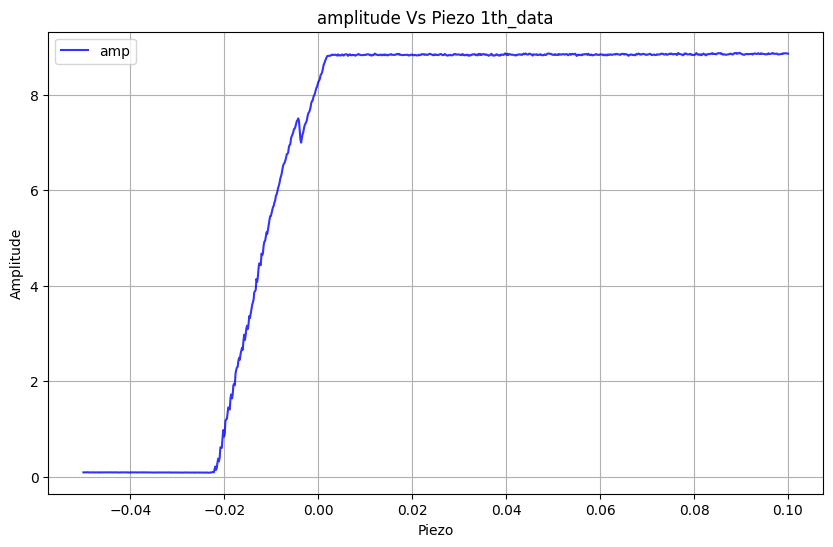

<Figure size 640x480 with 0 Axes>

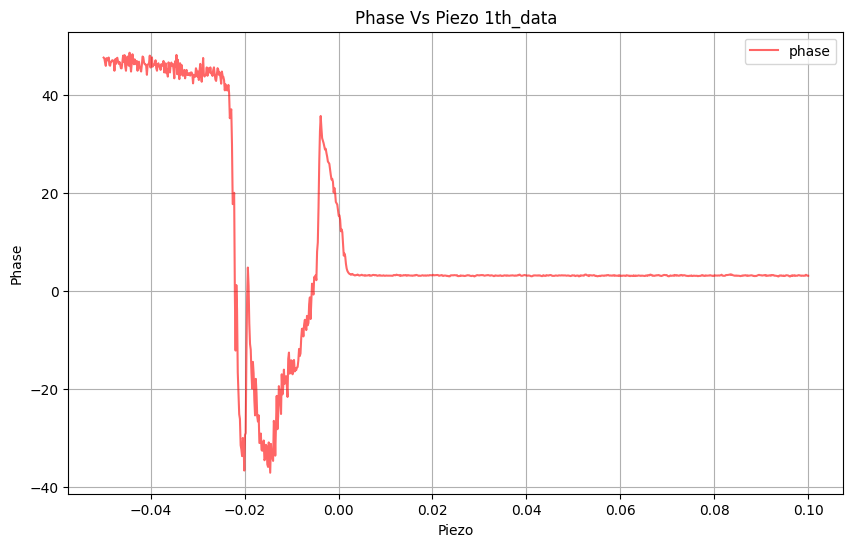

<Figure size 640x480 with 0 Axes>

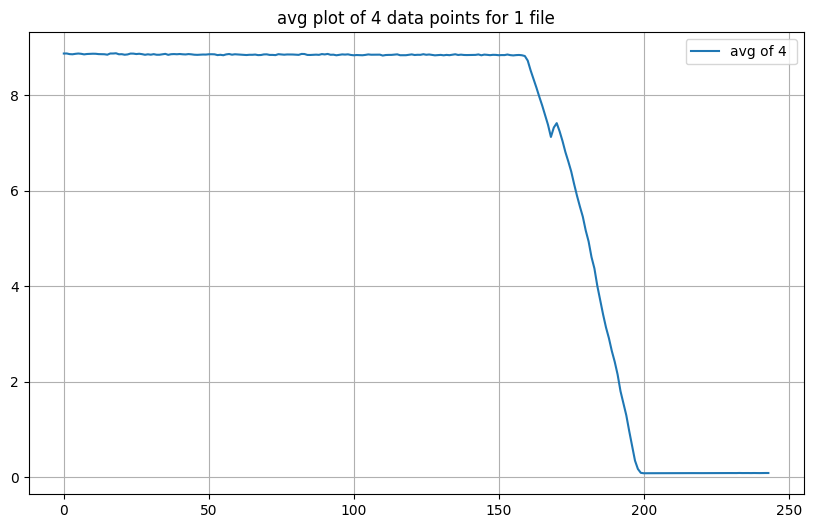

<------------------------!!!!-----------------------------> 8.153119366559999 8.833189715520001
please Reduce Average window size i.e. avg_window, keep it less than 10, if you get index = None
index of inflexion point w.r.to the average list(i.e. in list_avg) : 158 <-->
Inflexion index: 158


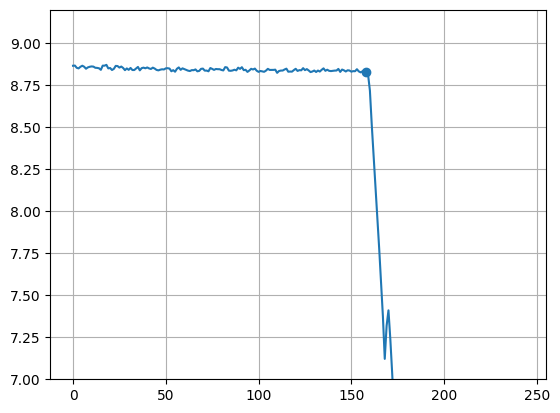

 this the actual index from where we get flat amplitude almost ! -->  349


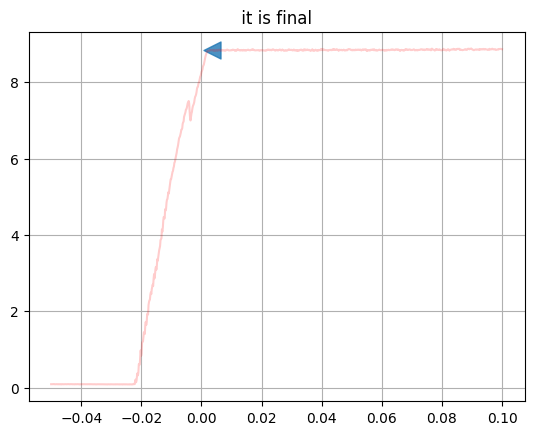

349
0.003565226960130313
 the shape and size of the amplitude array before the np.diff: (4:dataendpoint) 
 (345,)
x values
 and shape of x  4   -0.049412
5   -0.049258
6   -0.049105
7   -0.048951
8   -0.048798
Name: Piezo, dtype: float64 (345,)
I am indsid ethe array: function arary 
: [ 0.0041962   0.00114442 -0.0041962   0.00152589 -0.00267031  0.00114442
 -0.00038147  0.00190736  0.00076295 -0.00343325]
longest sequence =
 [294 295 296 297]
x axis=
 [-0.0042662  -0.00411264 -0.00395908 -0.00380553]
scat val x: 	 
 294
scat val y: 	 
 -0.05531353279999962


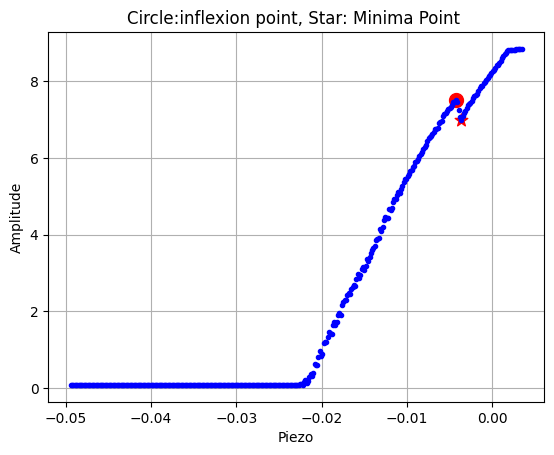


 Actual inflexion point Index with original data :   298  
 Actual Minima point Index before Slicing with original Data :  302 
 inflexion point index after slicing:  294 
 Minima point Index After slicing:  298

 index_inflexion ----------> 298

 index_minima ----------> 302
n count back =  27.0

 index starting wrto inflexion :  271.0 
 index starting wrto Minima :  275.0
m (slope in nA/nm ): for 1 file data 0.34252121345696757
c, zero intercept nA (intercept): for 1 file data 9.030469311513968


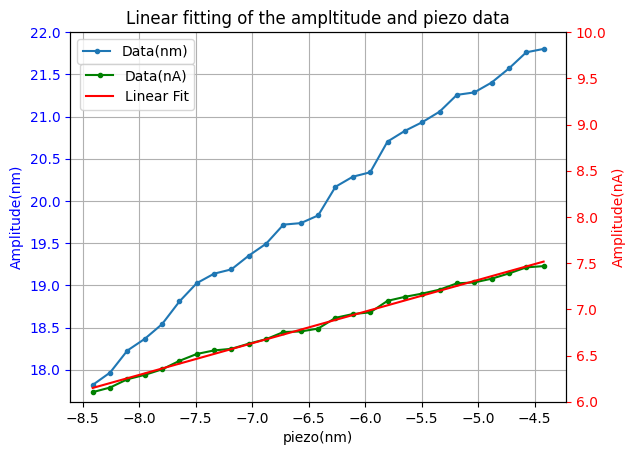

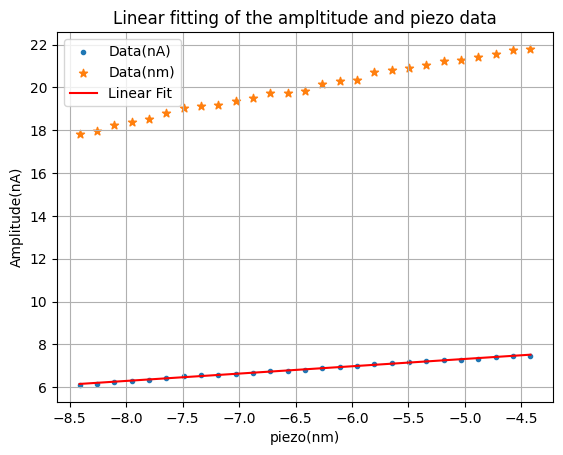

271   -8.412246
272   -8.258688
273   -8.105131
274   -7.951574
275   -7.798016
Name: Piezo, dtype: float64


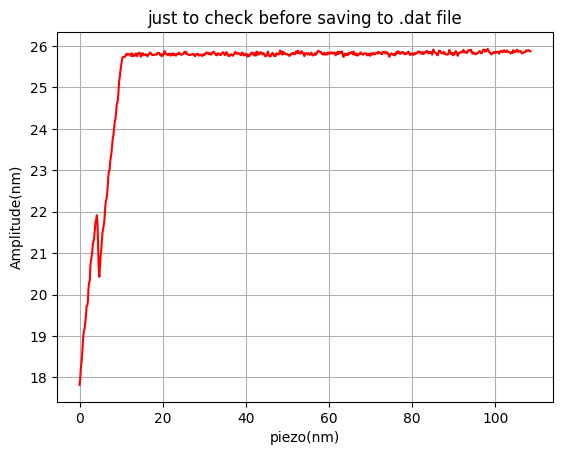

47.67553487399999

 (978,)

 new phase values: 
 0   -134.555394
1   -134.407077
2   -133.539151
3   -132.874473
4   -134.440037
Name: Phase, dtype: float64


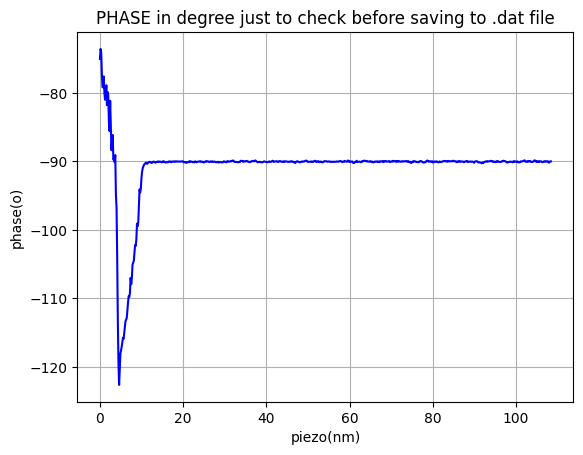

Directory 'processdata\' already exists.

 (707,) 
 (707,) 
 (707,)
Below this is before reverse and scientific notation and deletion: 
             Piezo     Amplitude      Phase
271  0.000000e+00  1.781952e-08 -75.058480
272  1.535573e-10  1.796541e-08 -73.591794
273  3.071147e-10  1.822714e-08 -74.130128
274  4.606720e-10  1.836524e-08 -77.244776
275  6.142294e-10  1.854009e-08 -79.150918
without heading or column index next we will see with index: 
                piezo        amplitude             phase
977  1.084114821E-07  2.587059606E-08  -9.000000000E+01
976  1.082579248E-07  2.587616466E-08  -9.000549321E+01
975  1.081043674E-07  2.589287045E-08  -9.009338450E+01
974  1.079508101E-07  2.590178021E-08  -9.019775542E+01
973  1.077972527E-07  2.589175673E-08  -9.001647962E+01
after final procees:
              piezo        amplitude             phase
0  1.084114821E-07  2.587059606E-08  -9.000000000E+01
1  1.082579248E-07  2.587616466E-08  -9.000549321E+01
2  1.081043674E-07  2.

<Figure size 640x480 with 0 Axes>

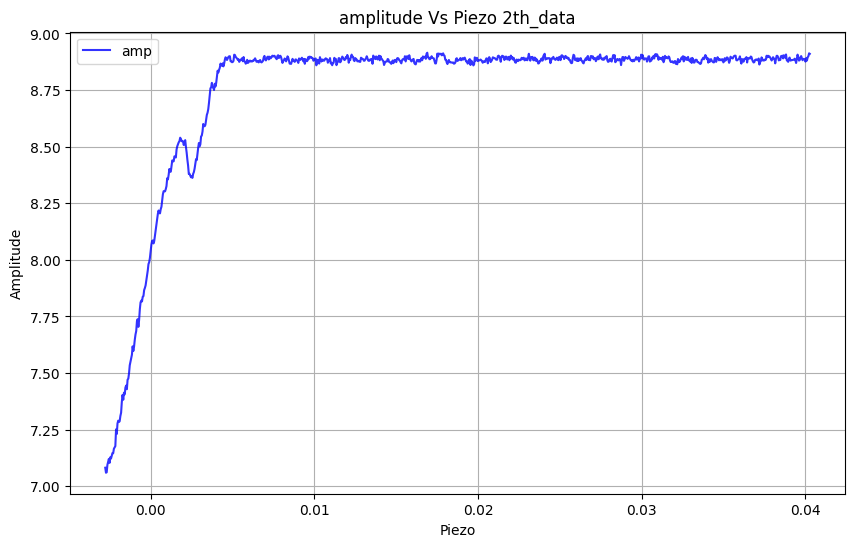

<Figure size 640x480 with 0 Axes>

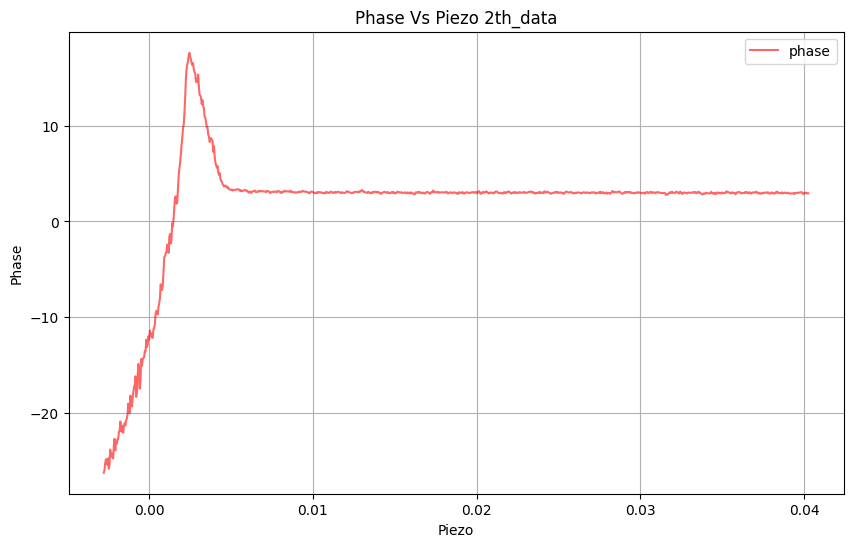

<Figure size 640x480 with 0 Axes>

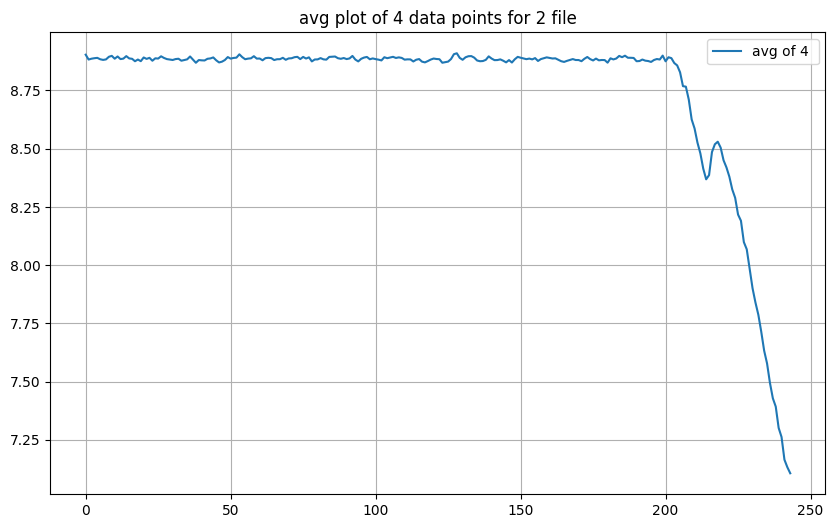

<------------------------!!!!-----------------------------> 8.766432003519999 8.87534244224
please Reduce Average window size i.e. avg_window, keep it less than 10, if you get index = None
index of inflexion point w.r.to the average list(i.e. in list_avg) : 202 <-->
Inflexion index: 202


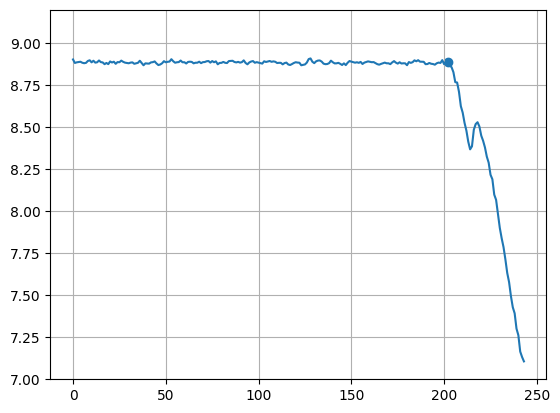

 this the actual index from where we get flat amplitude almost ! -->  174


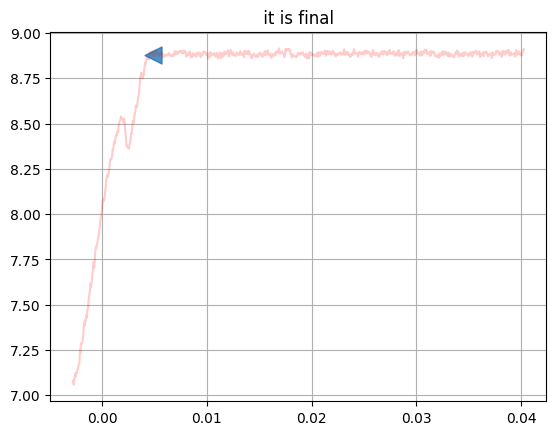

174
0.004884052691424548
 the shape and size of the amplitude array before the np.diff: (4:dataendpoint) 
 (170,)
x values
 and shape of x  4   -0.002597
5   -0.002553
6   -0.002509
7   -0.002465
8   -0.002421
Name: Piezo, dtype: float64 (170,)
I am indsid ethe array: function arary 
: [ 0.0125886  -0.01754774  0.02479572 -0.00572209  0.01182565  0.0125886
 -0.00114442  0.02021805  0.00572209  0.00572209]
longest sequence =
 [107 108 109 110 111]
x axis=
 [0.00211156 0.00215557 0.00219957 0.00224358 0.00228759]
scat val x: 	 
 107
scat val y: 	 
 -0.030136338560000198


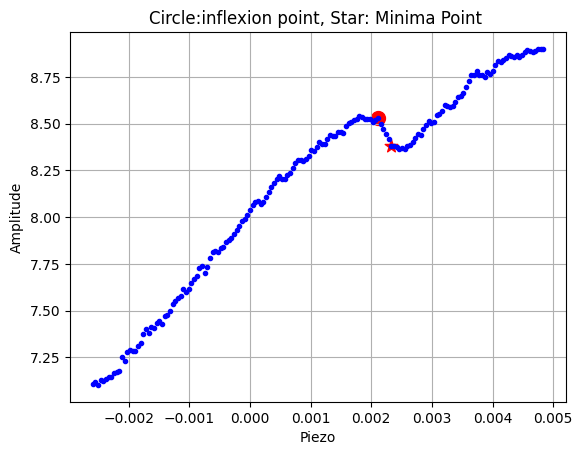


 Actual inflexion point Index with original data :   111  
 Actual Minima point Index before Slicing with original Data :  116 
 inflexion point index after slicing:  107 
 Minima point Index After slicing:  112

 index_inflexion ----------> 111

 index_minima ----------> 116
n count back =  91.0

 index starting wrto inflexion :  20.0 
 index starting wrto Minima :  25.0
m (slope in nA/nm ): for 2 file data 0.3323740846636267
c, zero intercept nA (intercept): for 2 file data 7.980903567103778


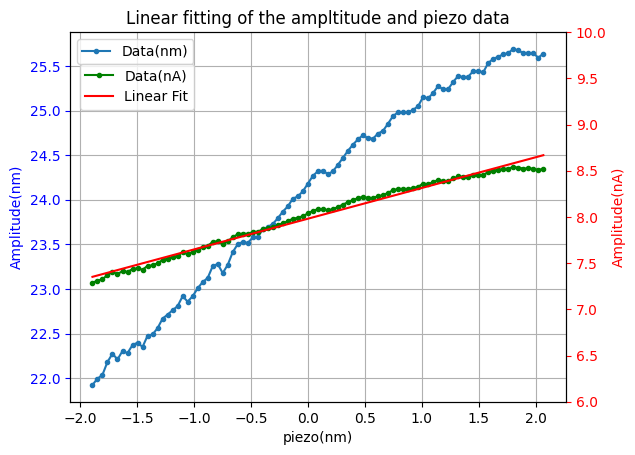

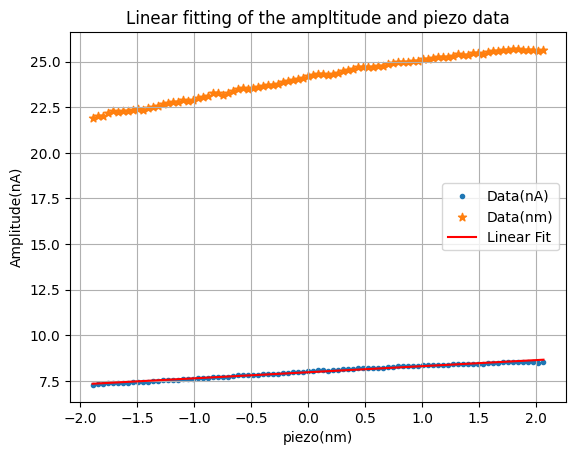

20   -1.893155
21   -1.849147
22   -1.805140
23   -1.761132
24   -1.717124
Name: Piezo, dtype: float64


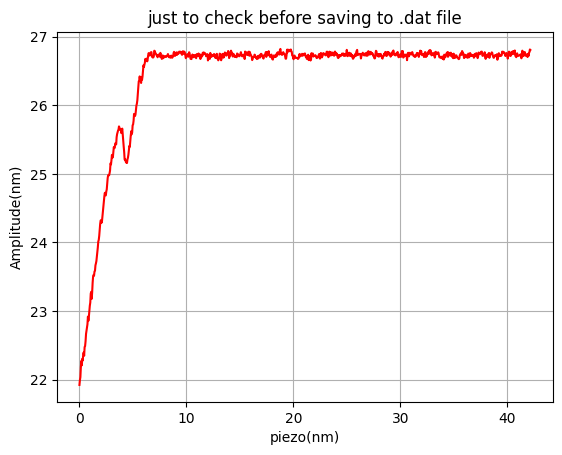

-26.290483916

 (979,)

 new phase values: 
 0   -60.770651
1   -61.012352
2   -61.764921
3   -62.193391
4   -61.797880
Name: Phase, dtype: float64


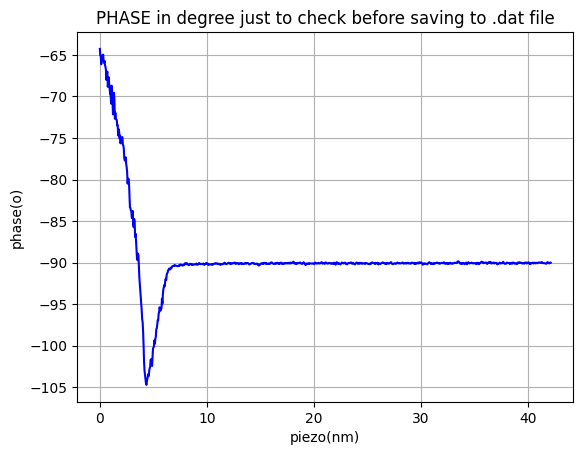

Directory 'processdata\' already exists.

 (959,) 
 (959,) 
 (959,)
Below this is before reverse and scientific notation and deletion: 
            Piezo     Amplitude      Phase
20  0.000000e+00  2.192376e-08 -64.275316
21  4.400784e-11  2.199377e-08 -65.060845
22  8.801569e-11  2.203739e-08 -65.088311
23  1.320235e-10  2.218200e-08 -66.121034
24  1.760314e-10  2.227382e-08 -65.665097
without heading or column index next we will see with index: 
                piezo        amplitude             phase
978  4.215951453E-08  2.680616628E-08  -9.000000000E+01
977  4.211550668E-08  2.681305260E-08  -8.997253397E+01
976  4.207149884E-08  2.677403010E-08  -9.002746603E+01
975  4.202749099E-08  2.675910973E-08  -9.007690488E+01
974  4.198348315E-08  2.671664406E-08  -9.003845244E+01
after final procees:
              piezo        amplitude             phase
0  4.215951453E-08  2.680616628E-08  -9.000000000E+01
1  4.211550668E-08  2.681305260E-08  -8.997253397E+01
2  4.207149884E-08  2.677403

<Figure size 640x480 with 0 Axes>

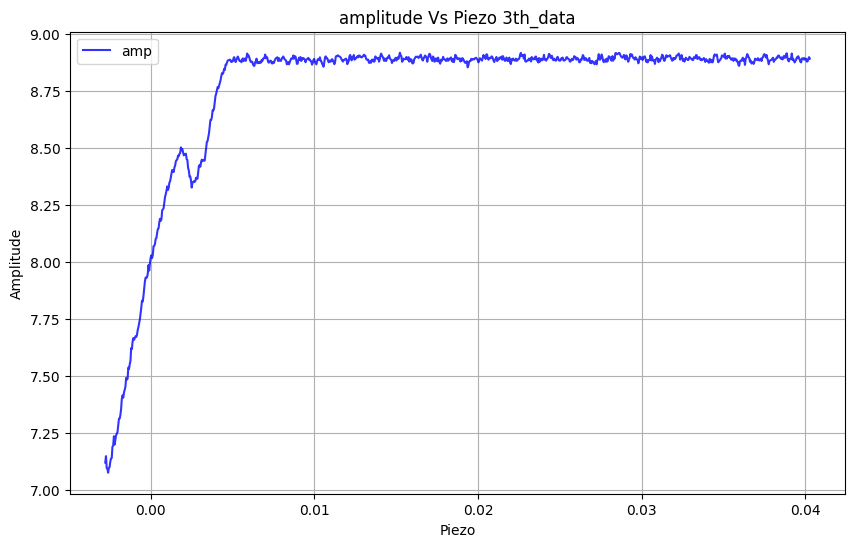

<Figure size 640x480 with 0 Axes>

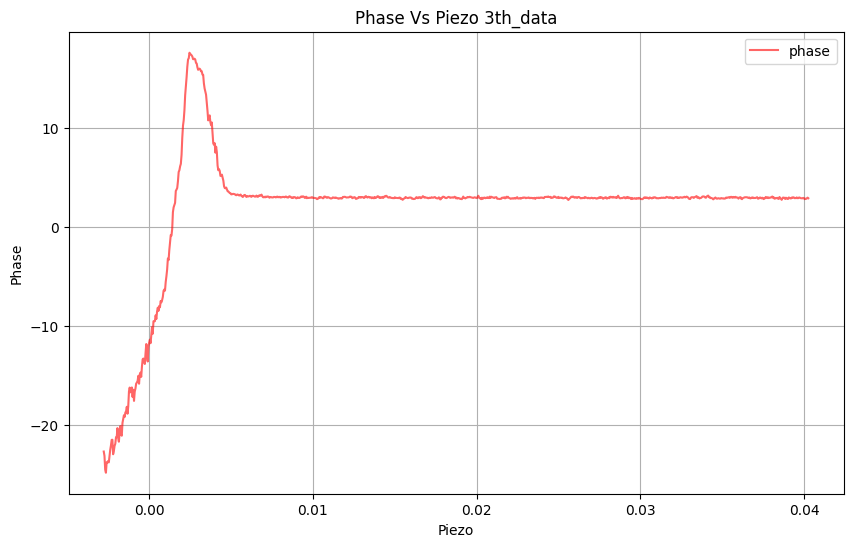

<Figure size 640x480 with 0 Axes>

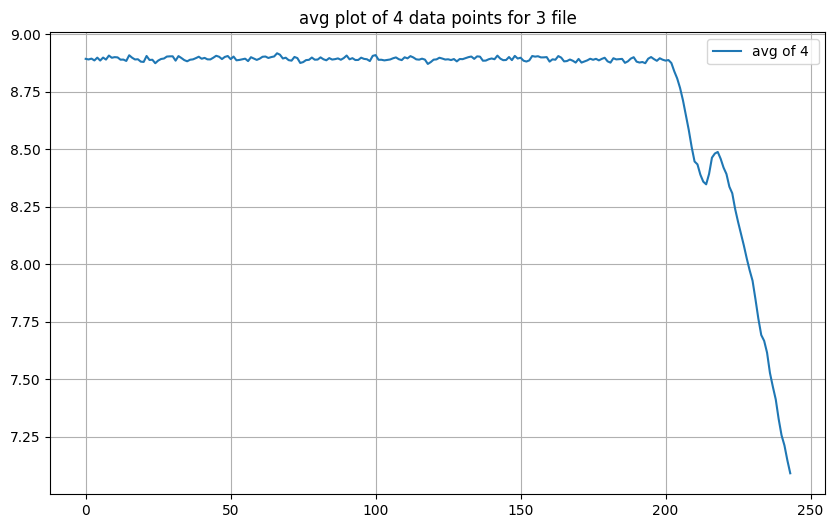

<------------------------!!!!-----------------------------> 8.647984748799999 8.88421168112
please Reduce Average window size i.e. avg_window, keep it less than 10, if you get index = None
index of inflexion point w.r.to the average list(i.e. in list_avg) : 202 <-->
Inflexion index: 202


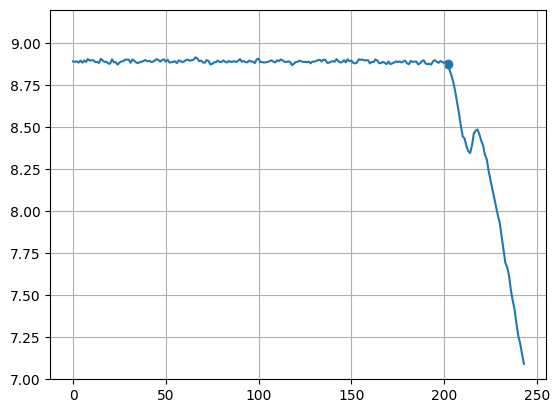

 this the actual index from where we get flat amplitude almost ! -->  174


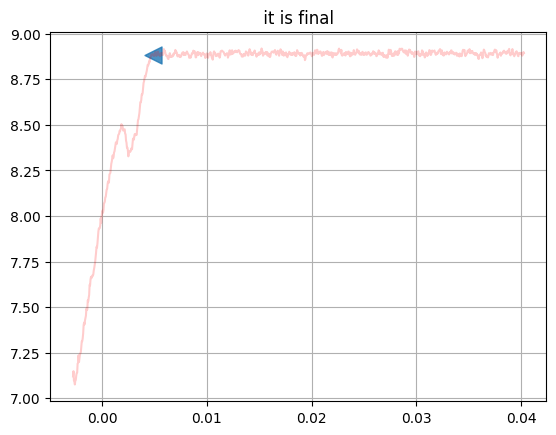

174
0.004884052691424548
 the shape and size of the amplitude array before the np.diff: (4:dataendpoint) 
 (170,)
x values
 and shape of x  4   -0.002597
5   -0.002553
6   -0.002509
7   -0.002465
8   -0.002421
Name: Piezo, dtype: float64 (170,)
I am indsid ethe array: function arary 
: [ 0.02136247  0.00305178  0.02403278  0.01373302  0.00228884  0.04997292
  0.0041962   0.04158052 -0.03662137  0.02021805]
longest sequence =
 [108 109 110 111 112]
x axis=
 [0.00215557 0.00219957 0.00224358 0.00228759 0.0023316 ]
scat val x: 	 
 108
scat val y: 	 
 -0.024032776320000337


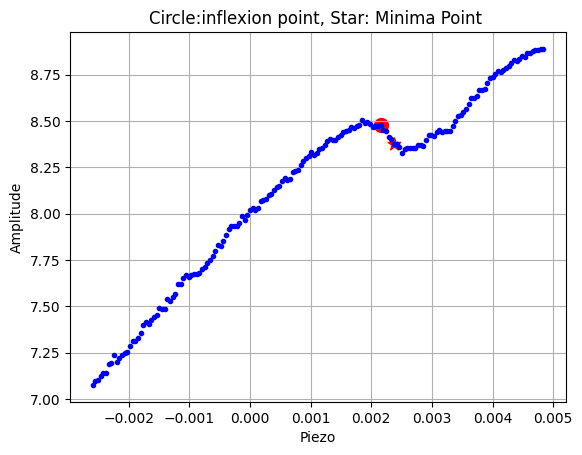


 Actual inflexion point Index with original data :   112  
 Actual Minima point Index before Slicing with original Data :  117 
 inflexion point index after slicing:  108 
 Minima point Index After slicing:  113

 index_inflexion ----------> 112

 index_minima ----------> 117
n count back =  91.0

 index starting wrto inflexion :  21.0 
 index starting wrto Minima :  26.0
m (slope in nA/nm ): for 3 file data 0.3065613908597409
c, zero intercept nA (intercept): for 3 file data 7.969675844753757


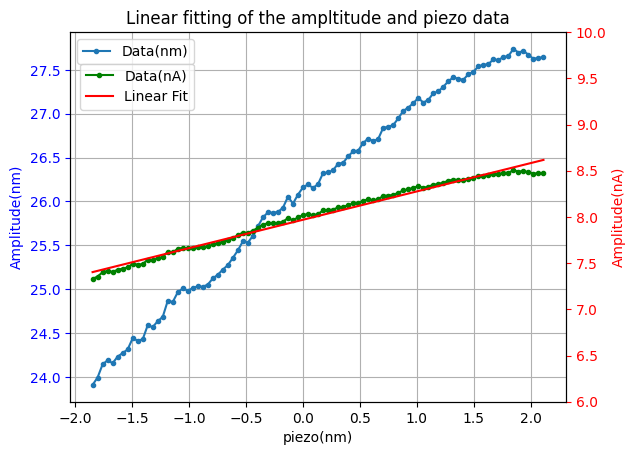

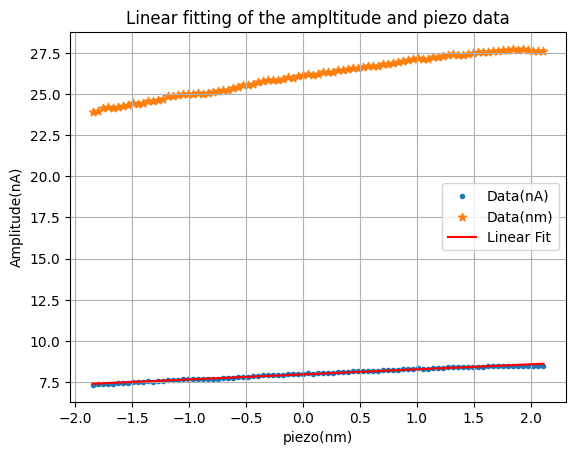

21   -1.849147
22   -1.805140
23   -1.761132
24   -1.717124
25   -1.673116
Name: Piezo, dtype: float64


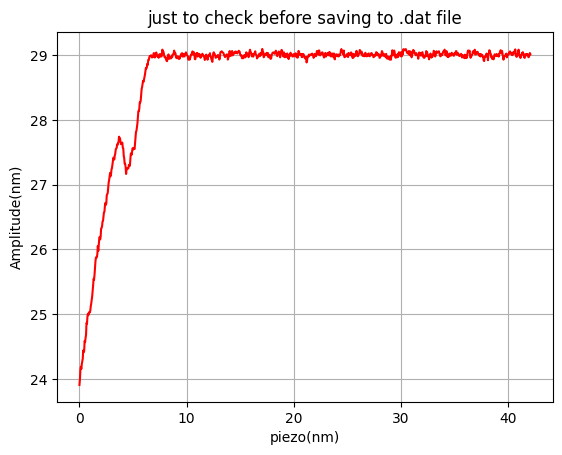

-22.675954368

 (979,)

 new phase values: 
 0   -64.390674
1   -63.956710
2   -62.561436
3   -62.248323
4   -63.297526
Name: Phase, dtype: float64


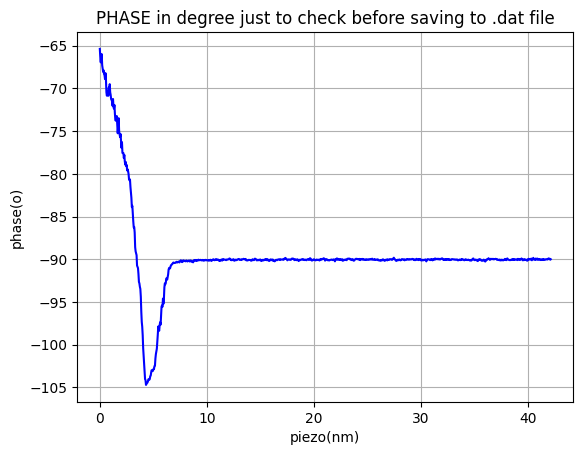

Directory 'processdata\' already exists.

 (958,) 
 (958,) 
 (958,)
Below this is before reverse and scientific notation and deletion: 
            Piezo     Amplitude      Phase
21  0.000000e+00  2.390788e-08 -65.384944
22  4.400784e-11  2.399250e-08 -66.346255
23  8.801569e-11  2.414182e-08 -66.961494
24  1.320235e-10  2.418911e-08 -66.088074
25  1.760314e-10  2.415551e-08 -65.989197
without heading or column index next we will see with index: 
                piezo        amplitude             phase
978  4.211550668E-08  2.900975766E-08  -9.000000000E+01
977  4.207149884E-08  2.903091177E-08  -9.006042527E+01
976  4.202749099E-08  2.900726894E-08  -8.998352038E+01
975  4.198348315E-08  2.897242687E-08  -8.993408153E+01
974  4.193947531E-08  2.896620507E-08  -8.995605435E+01
after final procees:
              piezo        amplitude             phase
0  4.211550668E-08  2.900975766E-08  -9.000000000E+01
1  4.207149884E-08  2.903091177E-08  -9.006042527E+01
2  4.202749099E-08  2.900726

<Figure size 640x480 with 0 Axes>

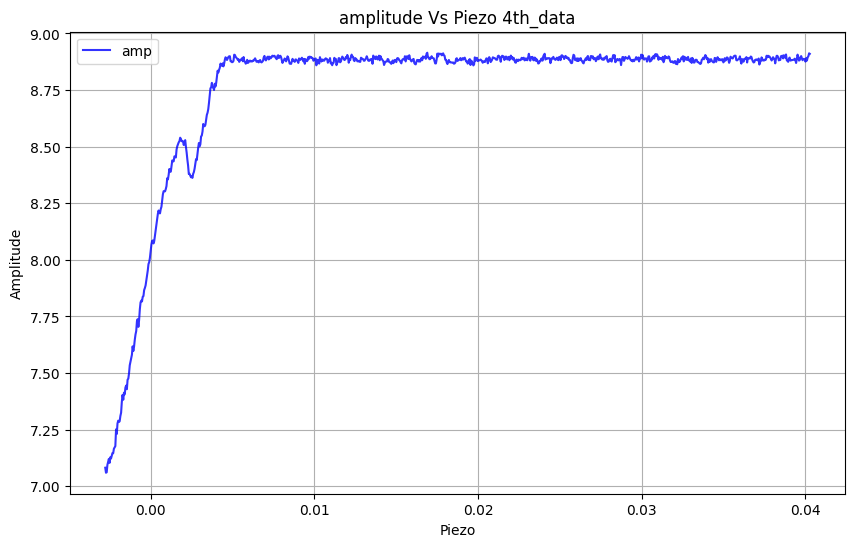

<Figure size 640x480 with 0 Axes>

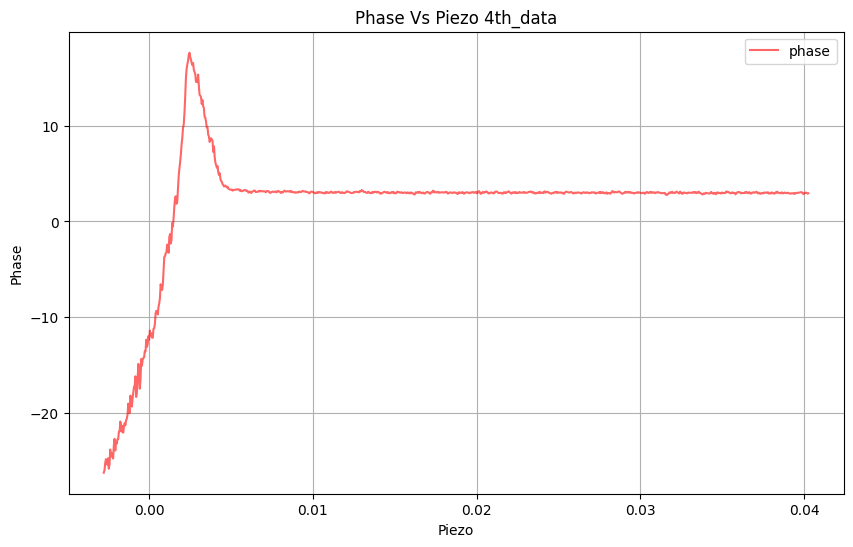

<Figure size 640x480 with 0 Axes>

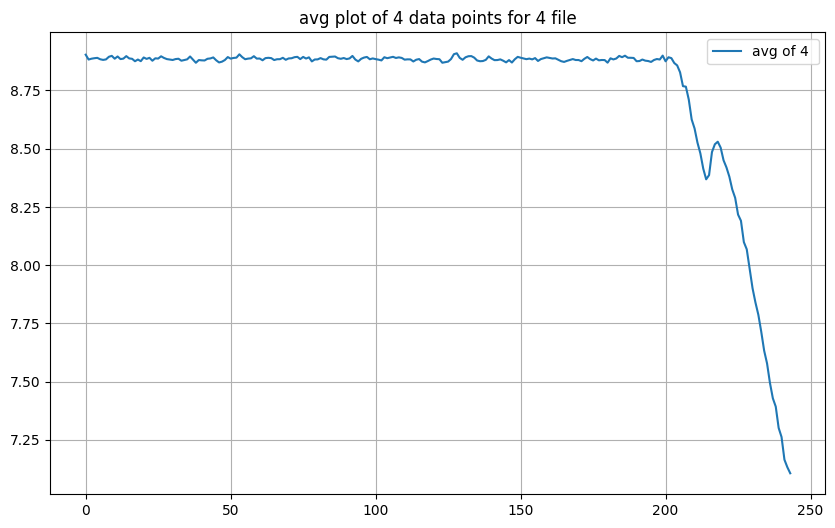

<------------------------!!!!-----------------------------> 8.766432003519999 8.87534244224
please Reduce Average window size i.e. avg_window, keep it less than 10, if you get index = None
index of inflexion point w.r.to the average list(i.e. in list_avg) : 202 <-->
Inflexion index: 202


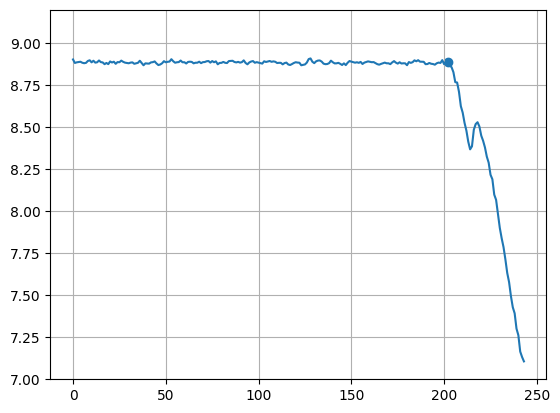

 this the actual index from where we get flat amplitude almost ! -->  174


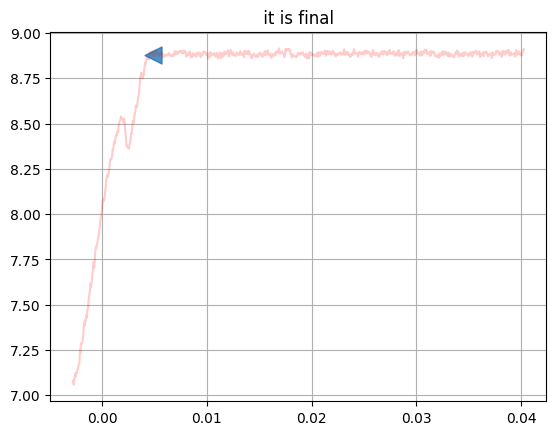

174
0.004884052691424548
 the shape and size of the amplitude array before the np.diff: (4:dataendpoint) 
 (170,)
x values
 and shape of x  4   -0.002597
5   -0.002553
6   -0.002509
7   -0.002465
8   -0.002421
Name: Piezo, dtype: float64 (170,)
I am indsid ethe array: function arary 
: [ 0.0125886  -0.01754774  0.02479572 -0.00572209  0.01182565  0.0125886
 -0.00114442  0.02021805  0.00572209  0.00572209]
longest sequence =
 [107 108 109 110 111]
x axis=
 [0.00211156 0.00215557 0.00219957 0.00224358 0.00228759]
scat val x: 	 
 107
scat val y: 	 
 -0.030136338560000198


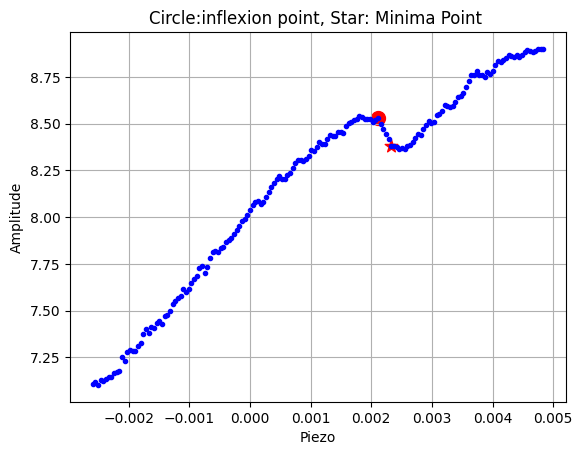


 Actual inflexion point Index with original data :   111  
 Actual Minima point Index before Slicing with original Data :  116 
 inflexion point index after slicing:  107 
 Minima point Index After slicing:  112

 index_inflexion ----------> 111

 index_minima ----------> 116
n count back =  91.0

 index starting wrto inflexion :  20.0 
 index starting wrto Minima :  25.0
m (slope in nA/nm ): for 4 file data 0.3323740846636267
c, zero intercept nA (intercept): for 4 file data 7.980903567103778


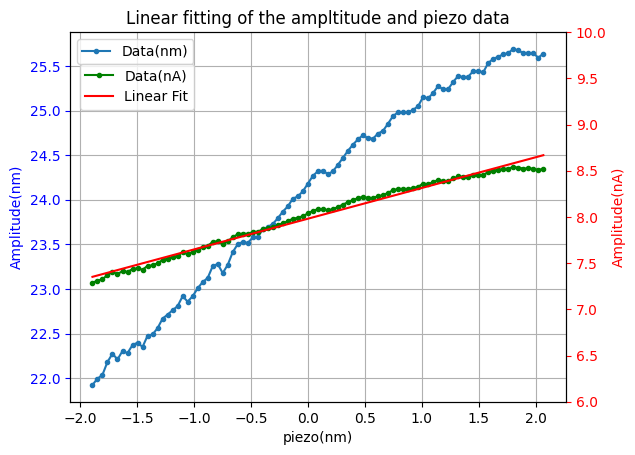

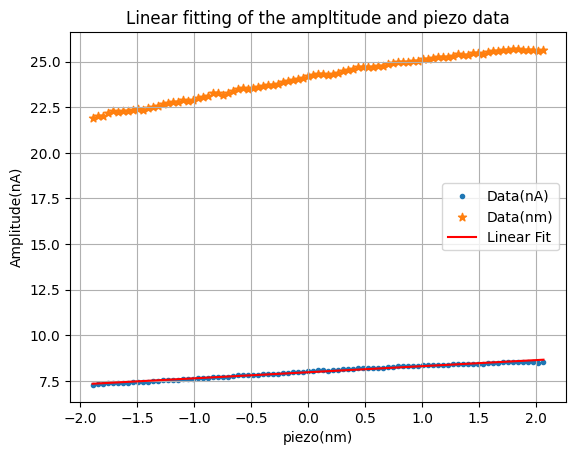

20   -1.893155
21   -1.849147
22   -1.805140
23   -1.761132
24   -1.717124
Name: Piezo, dtype: float64


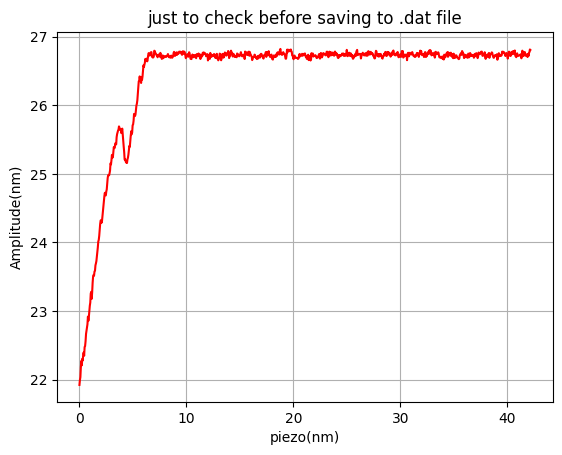

-26.290483916

 (979,)

 new phase values: 
 0   -60.770651
1   -61.012352
2   -61.764921
3   -62.193391
4   -61.797880
Name: Phase, dtype: float64


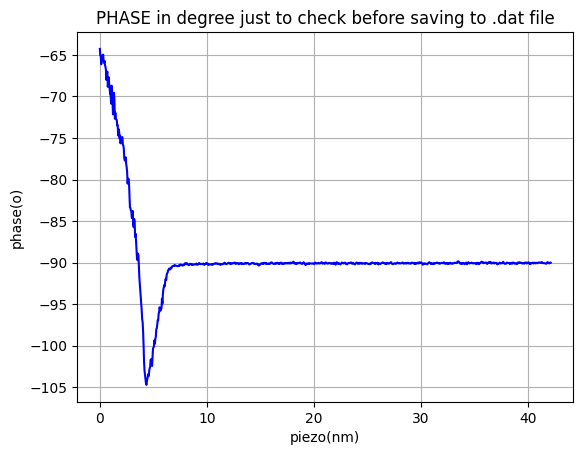

Directory 'processdata\' already exists.

 (959,) 
 (959,) 
 (959,)
Below this is before reverse and scientific notation and deletion: 
            Piezo     Amplitude      Phase
20  0.000000e+00  2.192376e-08 -64.275316
21  4.400784e-11  2.199377e-08 -65.060845
22  8.801569e-11  2.203739e-08 -65.088311
23  1.320235e-10  2.218200e-08 -66.121034
24  1.760314e-10  2.227382e-08 -65.665097
without heading or column index next we will see with index: 
                piezo        amplitude             phase
978  4.215951453E-08  2.680616628E-08  -9.000000000E+01
977  4.211550668E-08  2.681305260E-08  -8.997253397E+01
976  4.207149884E-08  2.677403010E-08  -9.002746603E+01
975  4.202749099E-08  2.675910973E-08  -9.007690488E+01
974  4.198348315E-08  2.671664406E-08  -9.003845244E+01
after final procees:
              piezo        amplitude             phase
0  4.215951453E-08  2.680616628E-08  -9.000000000E+01
1  4.211550668E-08  2.681305260E-08  -8.997253397E+01
2  4.207149884E-08  2.677403

<Figure size 640x480 with 0 Axes>

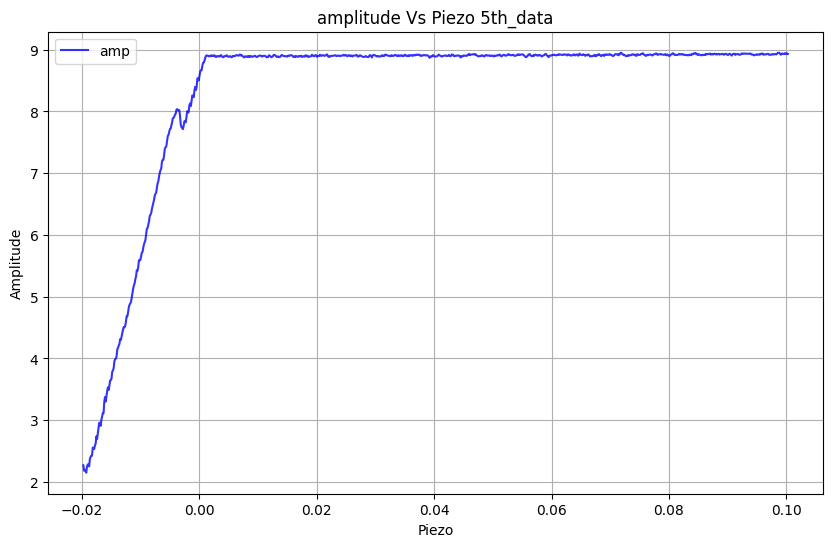

<Figure size 640x480 with 0 Axes>

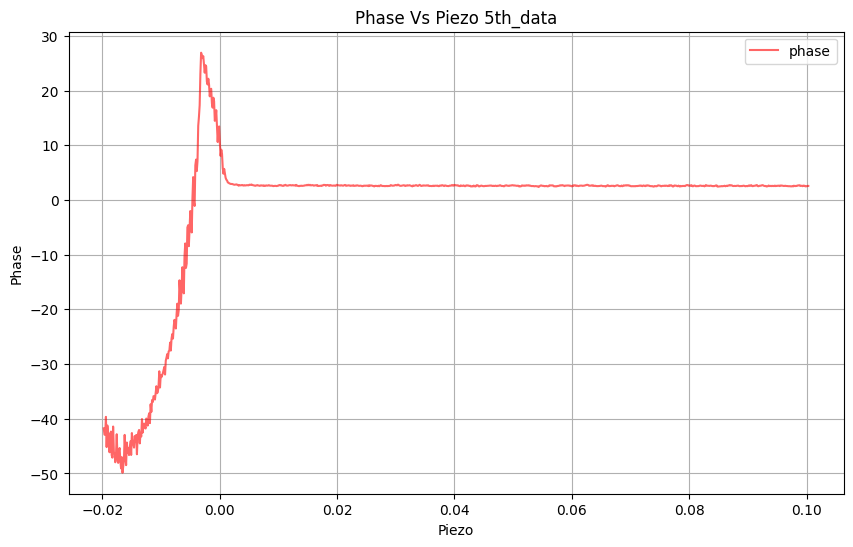

<Figure size 640x480 with 0 Axes>

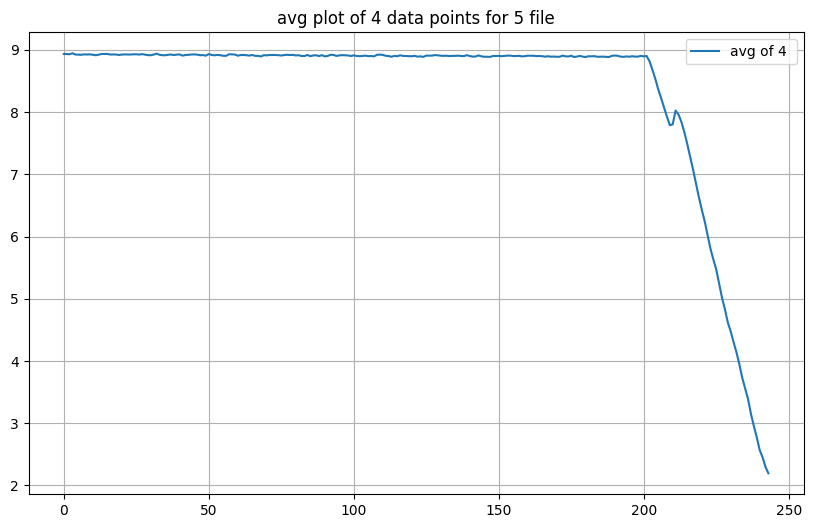

<------------------------!!!!-----------------------------> 8.07568042064 8.89622806928
please Reduce Average window size i.e. avg_window, keep it less than 10, if you get index = None
index of inflexion point w.r.to the average list(i.e. in list_avg) : 202 <-->
Inflexion index: 202


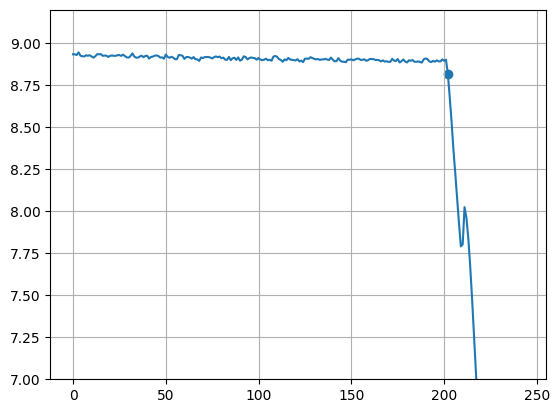

 this the actual index from where we get flat amplitude almost ! -->  173


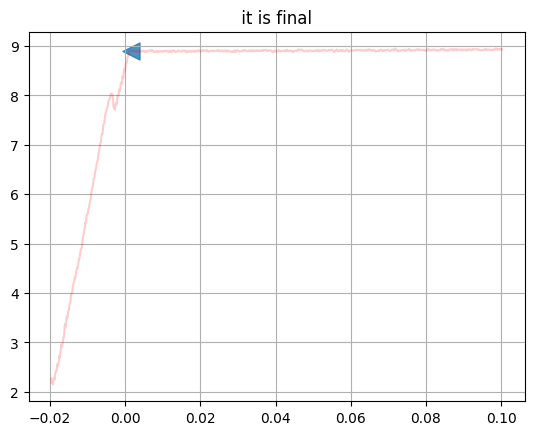

173
0.0015153756704574676
 the shape and size of the amplitude array before the np.diff: (4:dataendpoint) 
 (169,)
x values
 and shape of x  4   -0.019242
5   -0.019119
6   -0.018996
7   -0.018873
8   -0.018751
Name: Piezo, dtype: float64 (169,)
I am indsid ethe array: function arary 
: [ 0.09994583  0.03013634  0.00991829 -0.03776579  0.12016388  0.0320437
  0.02212541 -0.00076295  0.13160806 -0.02326983]
longest sequence =
 [128 129 130 131]
x axis=
 [-0.00352041 -0.00339759 -0.00327476 -0.00315194]
scat val x: 	 
 128
scat val y: 	 
 -0.0003814726399991031


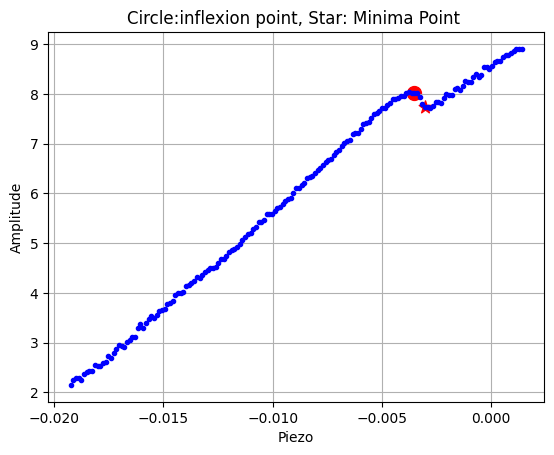


 Actual inflexion point Index with original data :   132  
 Actual Minima point Index before Slicing with original Data :  136 
 inflexion point index after slicing:  128 
 Minima point Index After slicing:  132

 index_inflexion ----------> 132

 index_minima ----------> 136
n count back =  33.0

 index starting wrto inflexion :  99.0 
 index starting wrto Minima :  103.0
m (slope in nA/nm ): for 5 file data 0.3781119333835215
c, zero intercept nA (intercept): for 5 file data 9.540460870210604


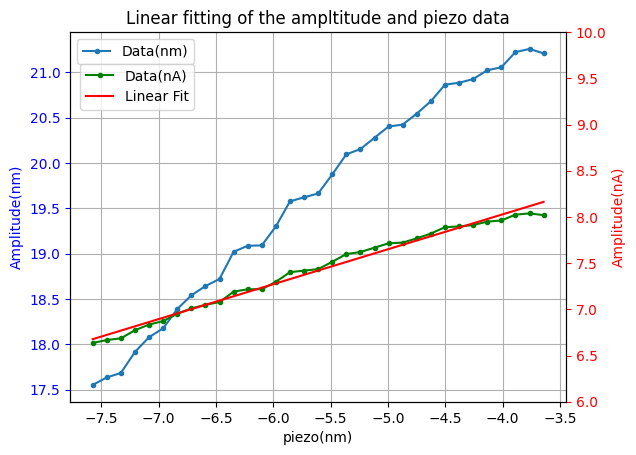

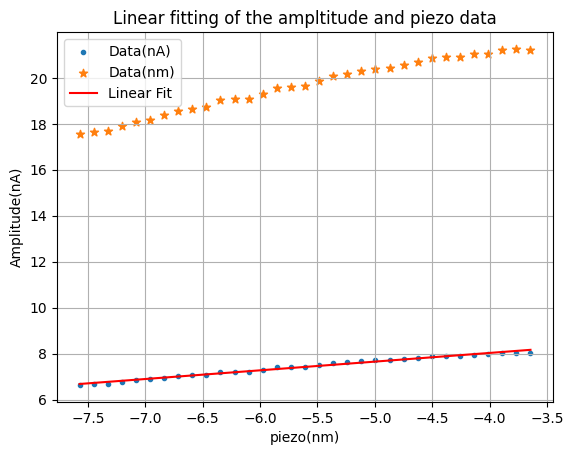

99    -7.573603
100   -7.450779
101   -7.327955
102   -7.205131
103   -7.082307
Name: Piezo, dtype: float64


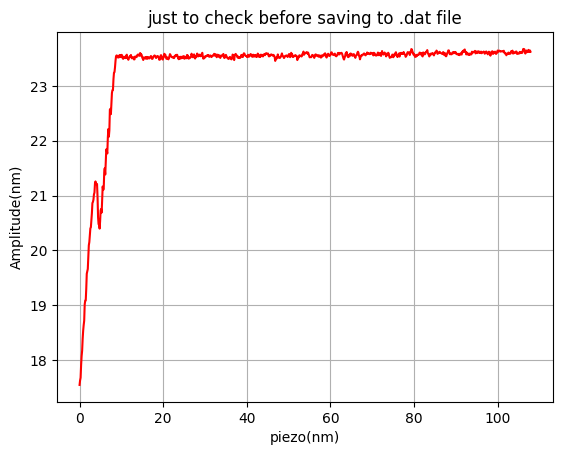

-41.742872393999995

 (978,)

 new phase values: 
 0   -45.691800
1   -44.549214
2   -44.477802
3   -47.784712
4   -42.258547
Name: Phase, dtype: float64


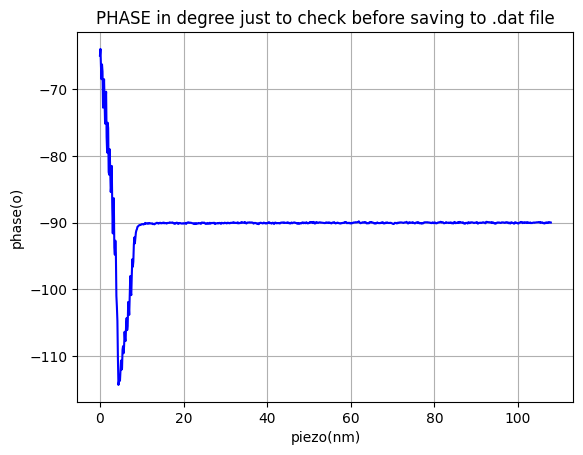

Directory 'processdata\' already exists.

 (879,) 
 (879,) 
 (879,)
Below this is before reverse and scientific notation and deletion: 
             Piezo     Amplitude      Phase
99   0.000000e+00  1.755062e-08 -64.934501
100  1.228240e-10  1.763335e-08 -63.940231
101  2.456481e-10  1.768278e-08 -66.560490
102  3.684721e-10  1.791483e-08 -68.477619
103  4.912961e-10  1.807726e-08 -66.263857
without heading or column index next we will see with index: 
                piezo        amplitude             phase
977  1.078395042E-07  2.362210659E-08  -9.000000000E+01
976  1.077166802E-07  2.364430213E-08  -9.001098641E+01
975  1.075938561E-07  2.362008881E-08  -8.993957473E+01
974  1.074710321E-07  2.363118658E-08  -8.995605435E+01
973  1.073482081E-07  2.365539990E-08  -8.991760191E+01
after final procees:
              piezo        amplitude             phase
0  1.078395042E-07  2.362210659E-08  -9.000000000E+01
1  1.077166802E-07  2.364430213E-08  -9.001098641E+01
2  1.075938561E-07  2.

<Figure size 640x480 with 0 Axes>

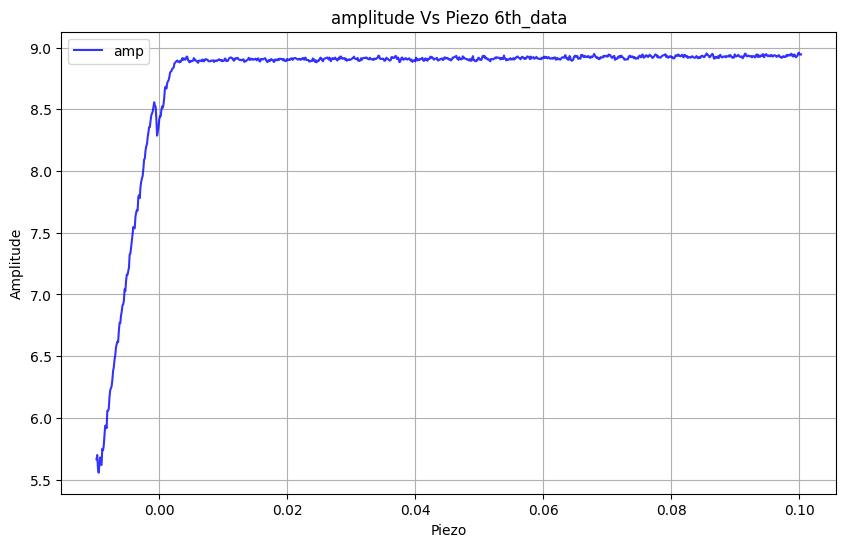

<Figure size 640x480 with 0 Axes>

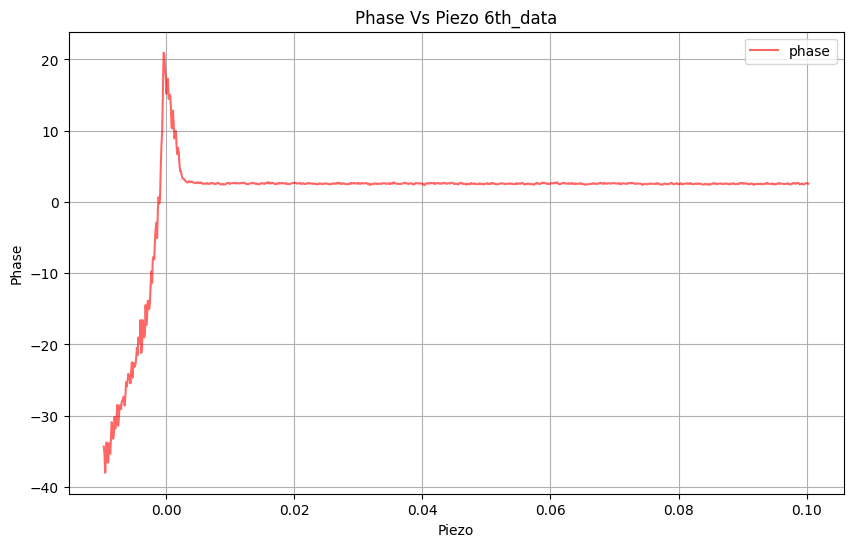

<Figure size 640x480 with 0 Axes>

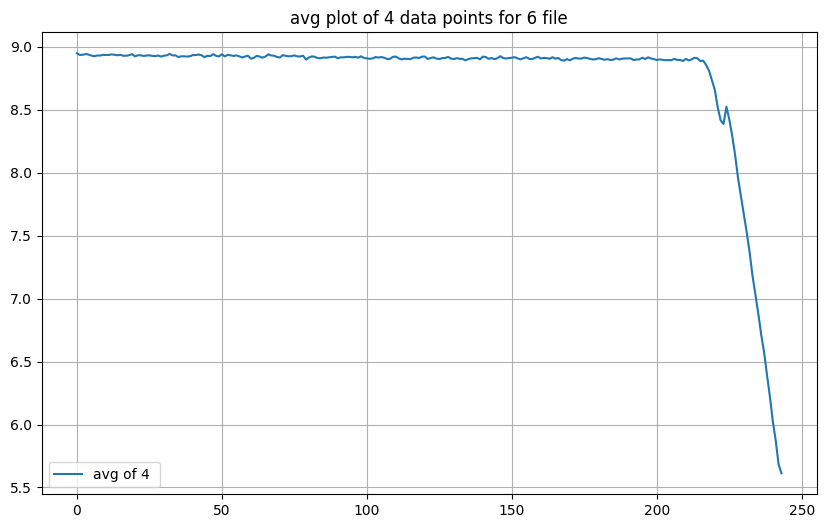

<------------------------!!!!-----------------------------> 8.41595401552 8.88564220352
please Reduce Average window size i.e. avg_window, keep it less than 10, if you get index = None
index of inflexion point w.r.to the average list(i.e. in list_avg) : 217 <-->
Inflexion index: 217


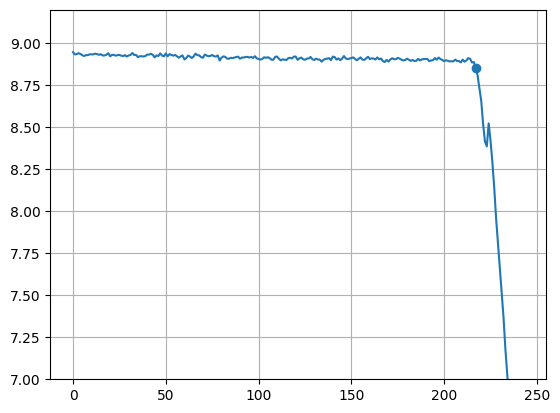

 this the actual index from where we get flat amplitude almost ! -->  113


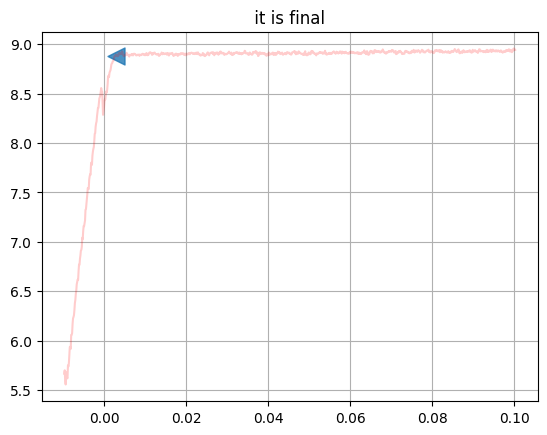

113
0.002965681895705584
 the shape and size of the amplitude array before the np.diff: (4:dataendpoint) 
 (109,)
x values
 and shape of x  4   -0.009309
5   -0.009197
6   -0.009084
7   -0.008972
8   -0.008859
Name: Piezo, dtype: float64 (109,)
I am indsid ethe array: function arary 
: [ 0.05645795 -0.05378764 -0.00686651  0.13084512 -0.01182565  0.03471401
  0.08125367  0.08201662  0.00305178 -0.02174394]
longest sequence =
 [76 77 78 79]
x axis=
 [-0.00075065 -0.00063803 -0.00052541 -0.0004128 ]
scat val x: 	 
 76
scat val y: 	 
 -0.027084557440000268


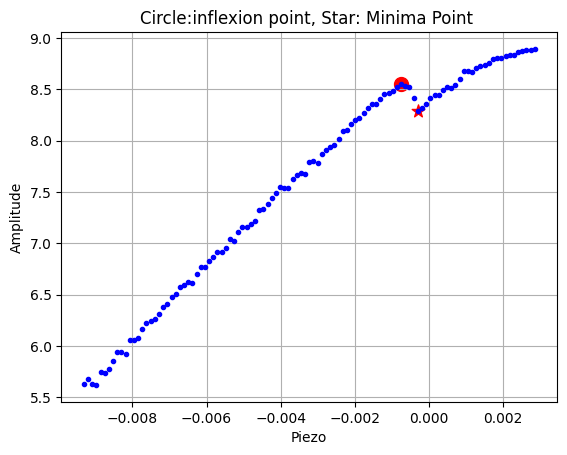


 Actual inflexion point Index with original data :   80  
 Actual Minima point Index before Slicing with original Data :  84 
 inflexion point index after slicing:  76 
 Minima point Index After slicing:  80

 index_inflexion ----------> 80

 index_minima ----------> 84
n count back =  36.0

 index starting wrto inflexion :  44.0 
 index starting wrto Minima :  48.0
m (slope in nA/nm ): for 6 file data 0.3372927745607562
c, zero intercept nA (intercept): for 6 file data 8.848570751163296


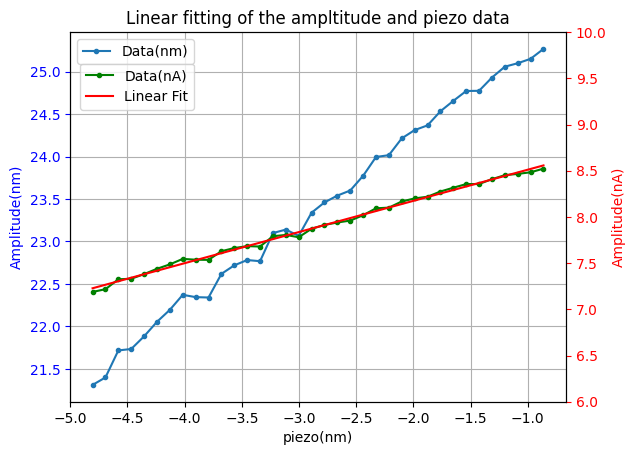

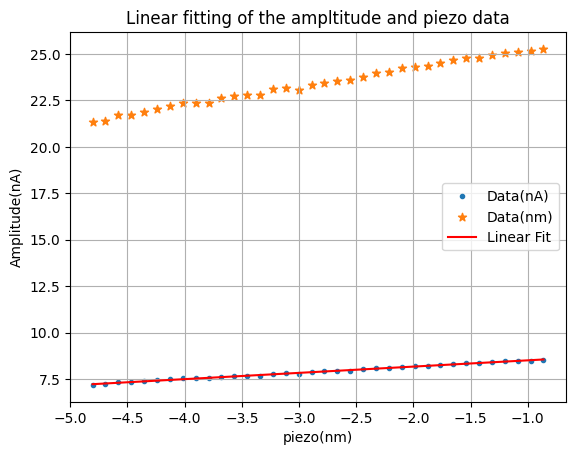

44   -4.804822
45   -4.692206
46   -4.579590
47   -4.466974
48   -4.354358
Name: Piezo, dtype: float64


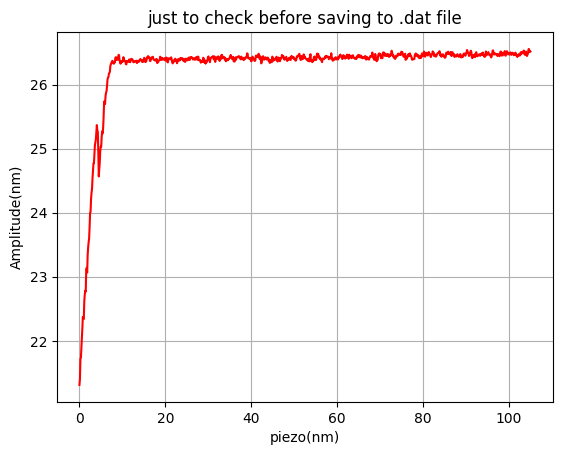

-34.343523911999995

 (978,)

 new phase values: 
 0   -53.091149
1   -52.074906
2   -49.421687
3   -51.454173
4   -53.678922
Name: Phase, dtype: float64


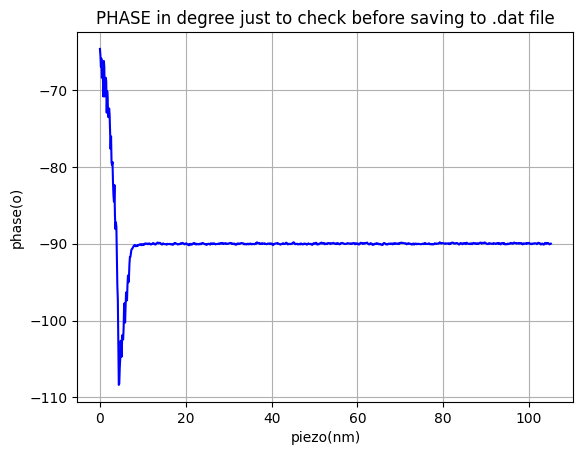

Directory 'processdata\' already exists.

 (934,) 
 (934,) 
 (934,)
Below this is before reverse and scientific notation and deletion: 
            Piezo     Amplitude      Phase
44  0.000000e+00  2.131113e-08 -64.659841
45  1.126160e-10  2.139934e-08 -65.544247
46  2.252320e-10  2.171715e-08 -66.977974
47  3.378480e-10  2.173411e-08 -65.917785
48  4.504640e-10  2.188340e-08 -68.400714
without heading or column index next we will see with index: 
                piezo        amplitude             phase
977  1.050707229E-07  2.651817550E-08  -9.000000000E+01
976  1.049581069E-07  2.651138960E-08  -9.005493206E+01
975  1.048454909E-07  2.651704451E-08  -9.005493206E+01
974  1.047328749E-07  2.655889091E-08  -9.008239809E+01
973  1.046202589E-07  2.654531911E-08  -9.003295924E+01
after final procees:
              piezo        amplitude             phase
0  1.050707229E-07  2.651817550E-08  -9.000000000E+01
1  1.049581069E-07  2.651138960E-08  -9.005493206E+01
2  1.048454909E-07  2.651704

<Figure size 640x480 with 0 Axes>

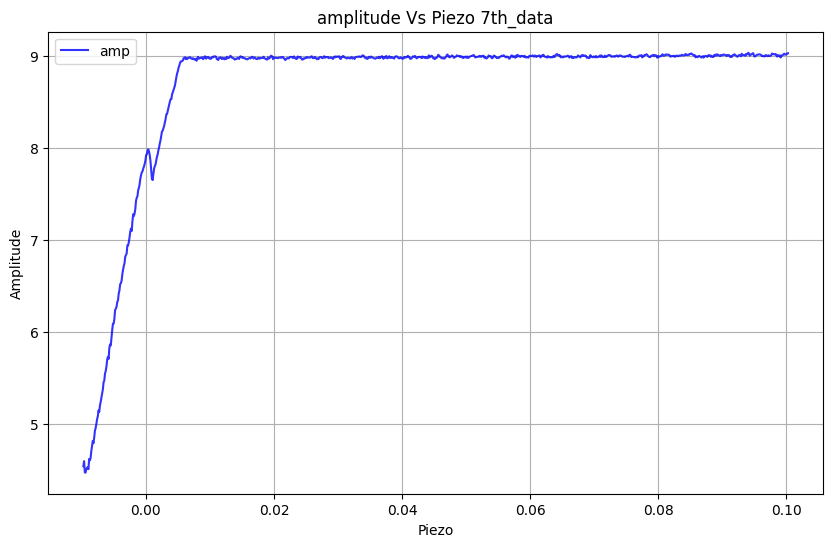

<Figure size 640x480 with 0 Axes>

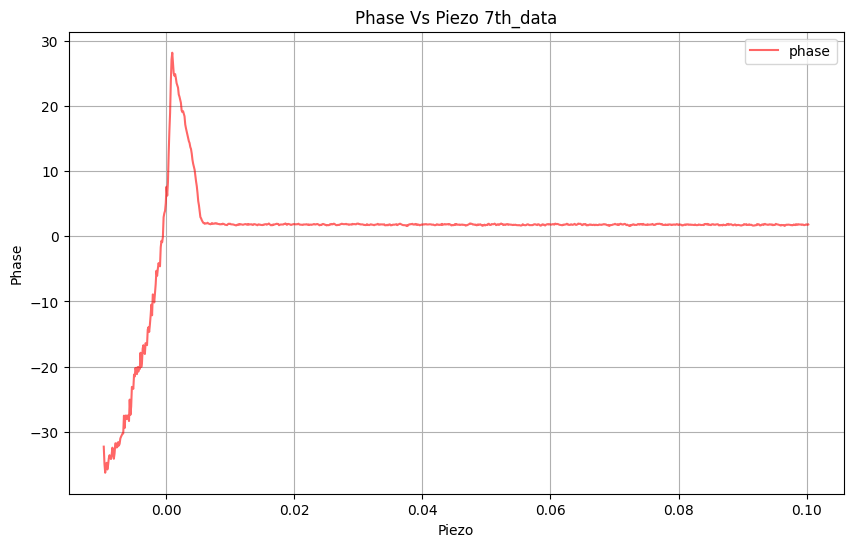

<Figure size 640x480 with 0 Axes>

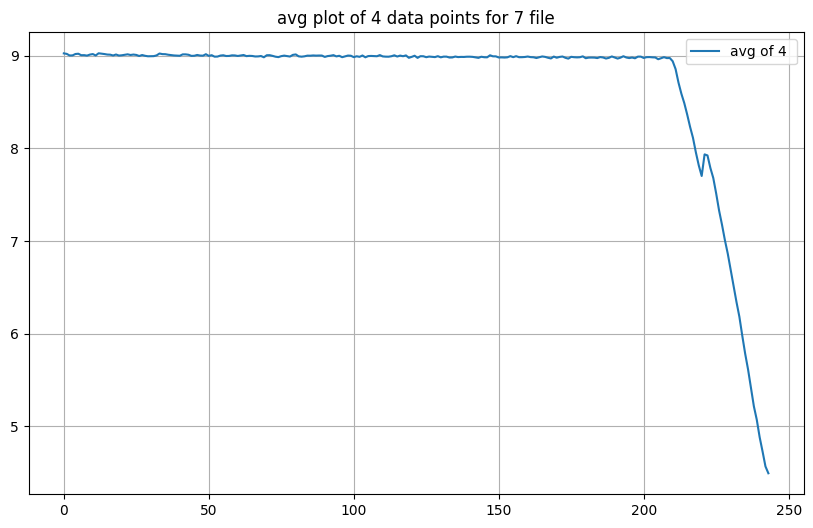

<------------------------!!!!-----------------------------> 8.36502741808 8.9736670152
please Reduce Average window size i.e. avg_window, keep it less than 10, if you get index = None
index of inflexion point w.r.to the average list(i.e. in list_avg) : 210 <-->
Inflexion index: 210


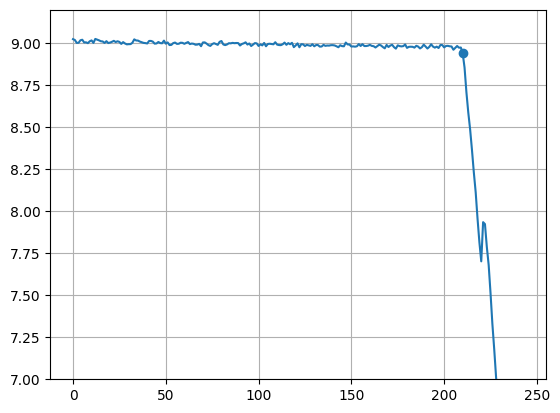

 this the actual index from where we get flat amplitude almost ! -->  141


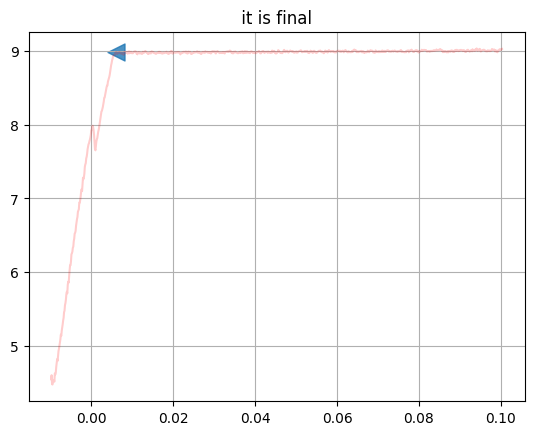

141
0.006118929742548872
 the shape and size of the amplitude array before the np.diff: (4:dataendpoint) 
 (137,)
x values
 and shape of x  4   -0.009309
5   -0.009197
6   -0.009084
7   -0.008972
8   -0.008859
Name: Piezo, dtype: float64 (137,)
I am indsid ethe array: function arary 
: [ 0.01029976  0.01335154 -0.0236513   0.11215296 -0.01602185  0.02594014
  0.07629453  0.05111733  0.05683942 -0.02441425]
longest sequence =
 [86 87 88 89 90 91]
x axis=
 [0.00037551 0.00048813 0.00060075 0.00071336 0.00082598 0.00093859]
scat val x: 	 
 86
scat val y: 	 
 -0.022506885760000372


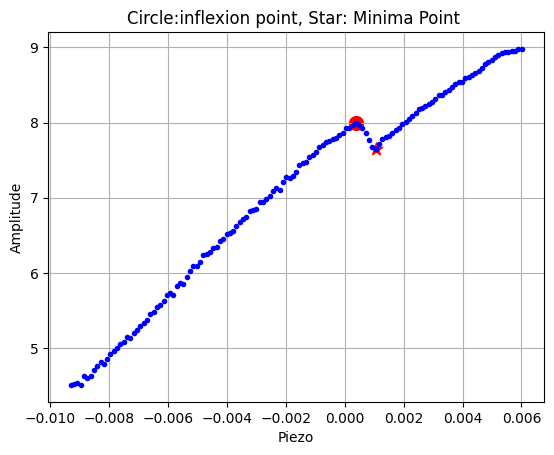


 Actual inflexion point Index with original data :   90  
 Actual Minima point Index before Slicing with original Data :  96 
 inflexion point index after slicing:  86 
 Minima point Index After slicing:  92

 index_inflexion ----------> 90

 index_minima ----------> 96
n count back =  36.0

 index starting wrto inflexion :  54.0 
 index starting wrto Minima :  60.0
m (slope in nA/nm ): for 7 file data 0.34708346630270537
c, zero intercept nA (intercept): for 7 file data 7.923812792903295


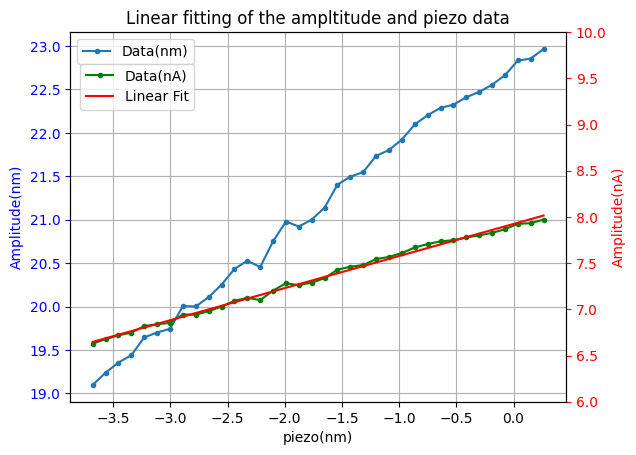

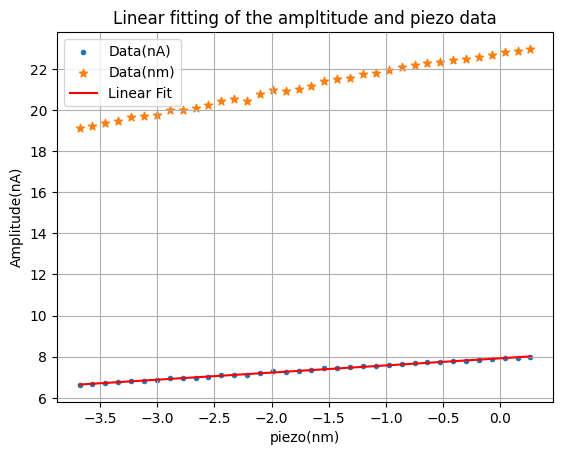

54   -3.678662
55   -3.566046
56   -3.453430
57   -3.340814
58   -3.228198
Name: Piezo, dtype: float64


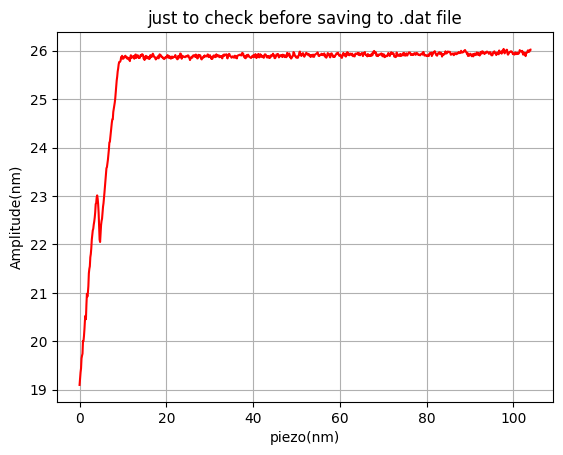

-32.267092043999995

 (978,)

 new phase values: 
 0   -55.936630
1   -53.283411
2   -51.937576
3   -53.195520
4   -53.459194
Name: Phase, dtype: float64


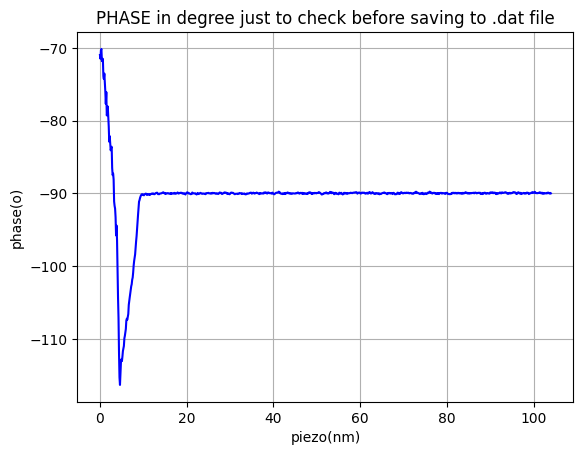

Directory 'processdata\' already exists.

 (924,) 
 (924,) 
 (924,)
Below this is before reverse and scientific notation and deletion: 
            Piezo     Amplitude      Phase
54  0.000000e+00  1.909872e-08 -70.982521
55  1.126160e-10  1.923940e-08 -71.487896
56  2.252320e-10  1.935591e-08 -70.328829
57  3.378480e-10  1.944163e-08 -70.142060
58  4.504640e-10  1.964496e-08 -71.806502
without heading or column index next we will see with index: 
                piezo        amplitude             phase
977  1.039445630E-07  2.602292697E-08  -9.000000000E+01
976  1.038319470E-07  2.601962973E-08  -8.993957473E+01
975  1.037193310E-07  2.598336008E-08  -8.999450679E+01
974  1.036067150E-07  2.597896376E-08  -9.002746603E+01
973  1.034940990E-07  2.597786468E-08  -8.994506794E+01
after final procees:
              piezo        amplitude             phase
0  1.039445630E-07  2.602292697E-08  -9.000000000E+01
1  1.038319470E-07  2.601962973E-08  -8.993957473E+01
2  1.037193310E-07  2.598336

<Figure size 640x480 with 0 Axes>

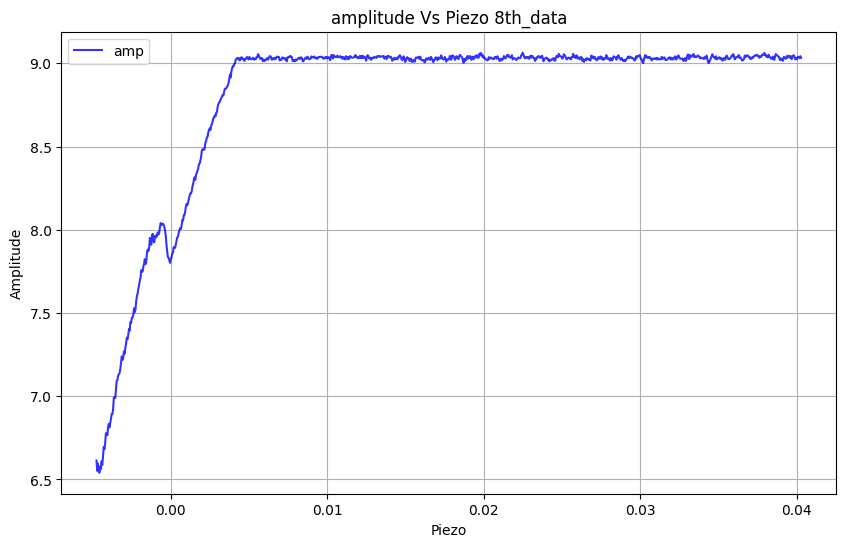

<Figure size 640x480 with 0 Axes>

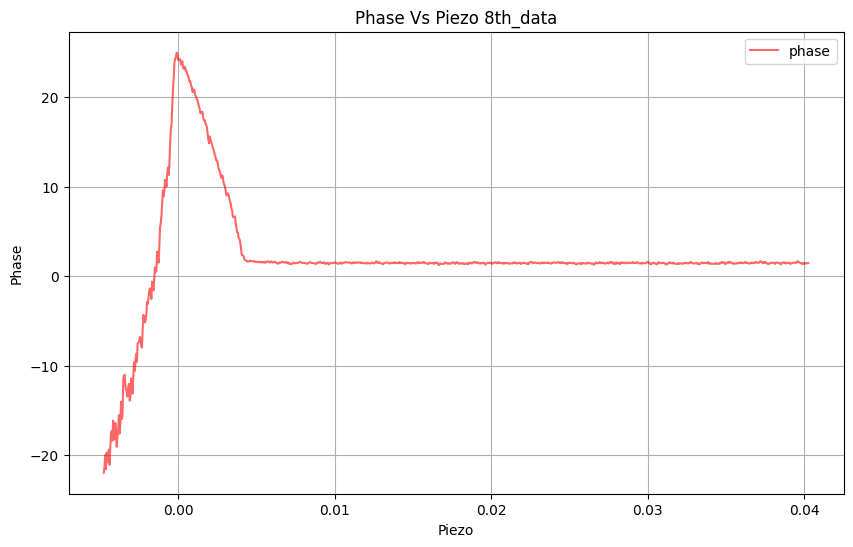

<Figure size 640x480 with 0 Axes>

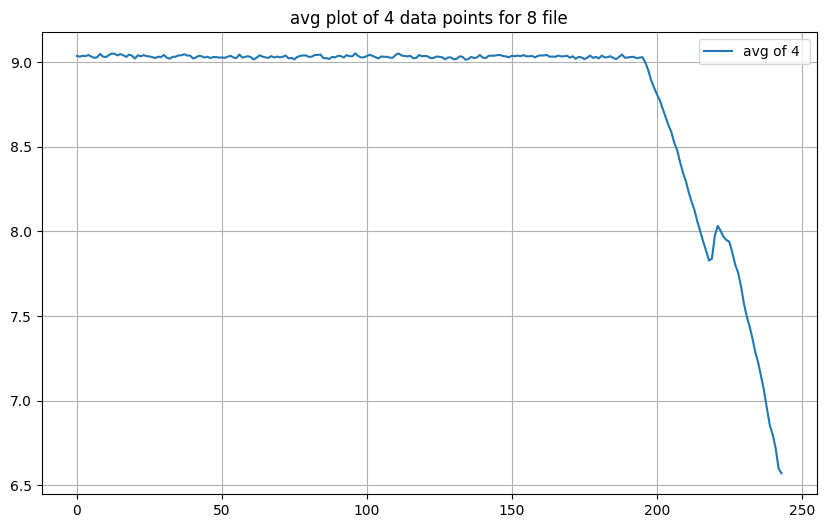

<------------------------!!!!-----------------------------> 8.77615955584 9.02640560768
please Reduce Average window size i.e. avg_window, keep it less than 10, if you get index = None
index of inflexion point w.r.to the average list(i.e. in list_avg) : 196 <-->
Inflexion index: 196


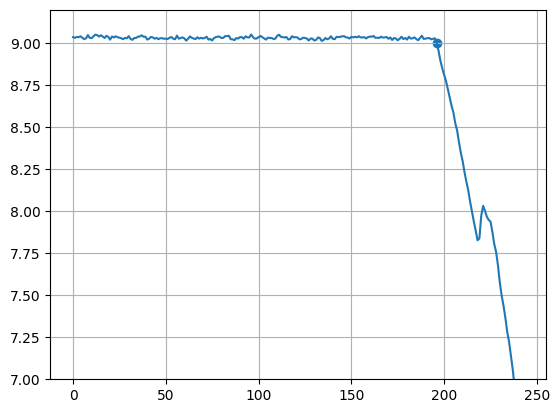

 this the actual index from where we get flat amplitude almost ! -->  197


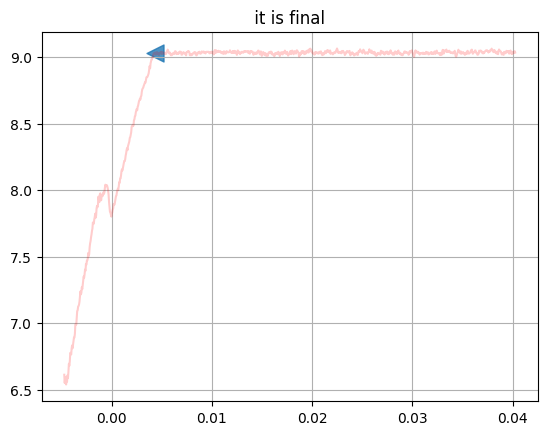

197
0.004329683764496657
 the shape and size of the amplitude array before the np.diff: (4:dataendpoint) 
 (193,)
x values
 and shape of x  4   -0.004562
5   -0.004516
6   -0.004470
7   -0.004424
8   -0.004378
Name: Piezo, dtype: float64 (193,)
I am indsid ethe array: function arary 
: [ 0.03547696 -0.01449596  0.04768408 -0.02136247  0.04730261  0.06103562
 -0.01487743  0.03395106  0.06256151  0.        ]
longest sequence =
 [88 89 90 91 92 93 94 95 96 97]
x axis=
 [-5.07945627e-04 -4.61872966e-04 -4.15800306e-04 -3.69727645e-04
 -3.23654984e-04 -2.77582323e-04 -2.31509662e-04 -1.85437001e-04
 -1.39364340e-04 -9.32916794e-05]
scat val x: 	 
 88
scat val y: 	 
 -0.00648503488000074


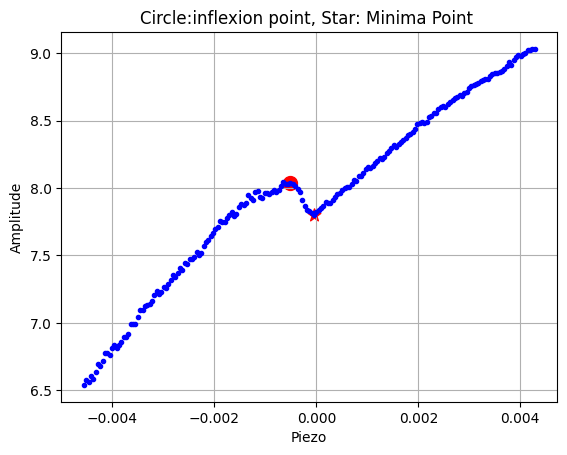


 Actual inflexion point Index with original data :   92  
 Actual Minima point Index before Slicing with original Data :  102 
 inflexion point index after slicing:  88 
 Minima point Index After slicing:  98

 index_inflexion ----------> 92

 index_minima ----------> 102
n count back =  87.0

 index starting wrto inflexion :  5.0 
 index starting wrto Minima :  15.0
m (slope in nA/nm ): for 8 file data 0.39031686276601707
c, zero intercept nA (intercept): for 8 file data 8.397795311232642


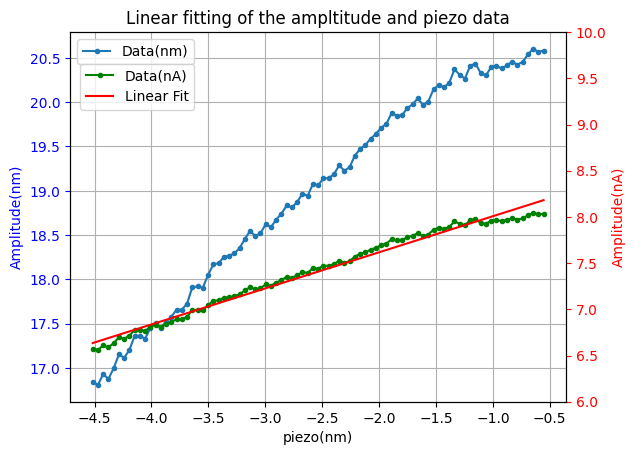

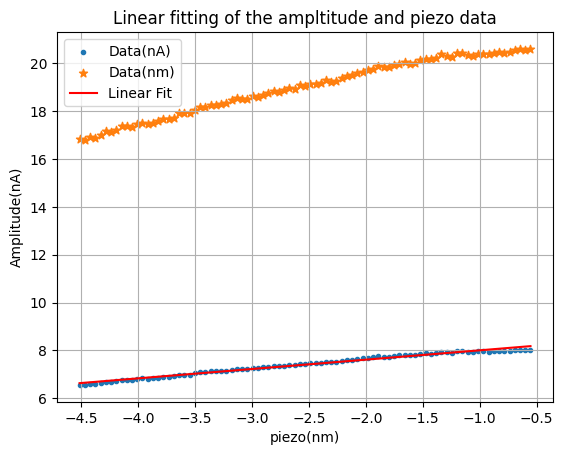

5   -4.516267
6   -4.470194
7   -4.424122
8   -4.378049
9   -4.331976
Name: Piezo, dtype: float64


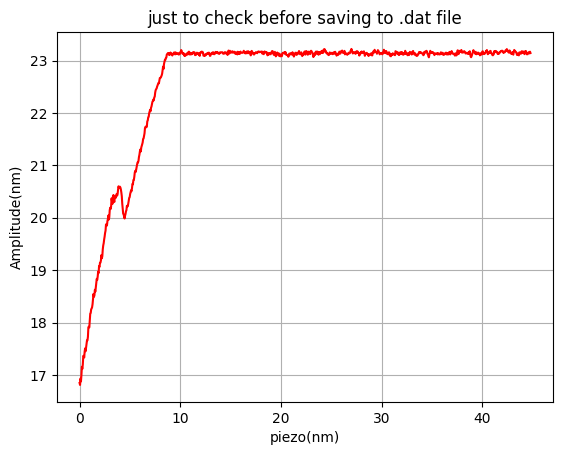

-21.978317206

 (978,)

 new phase values: 
 0   -66.560490
1   -67.159249
2   -68.532551
3   -66.950508
4   -68.807211
Name: Phase, dtype: float64


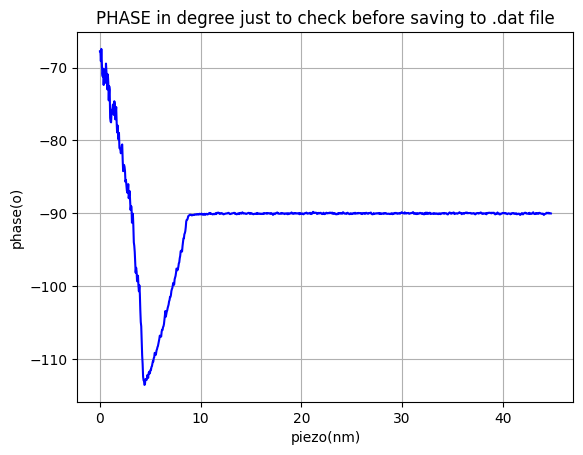

Directory 'processdata\' already exists.

 (973,) 
 (973,) 
 (973,)
Below this is before reverse and scientific notation and deletion: 
           Piezo     Amplitude      Phase
5  0.000000e+00  1.684740e-08 -67.763502
6  4.607266e-11  1.681026e-08 -67.763502
7  9.214532e-11  1.693243e-08 -69.125817
8  1.382180e-10  1.687770e-08 -67.444896
9  1.842906e-10  1.699889e-08 -69.329066
without heading or column index next we will see with index: 
                piezo        amplitude             phase
977  4.478262637E-08  2.314343288E-08  -9.000000000E+01
976  4.473655371E-08  2.316884374E-08  -8.998352038E+01
975  4.469048105E-08  2.313756883E-08  -8.996154756E+01
974  4.464440839E-08  2.315418363E-08  -9.000000000E+01
973  4.459833573E-08  2.315907033E-08  -8.997253397E+01
after final procees:
              piezo        amplitude             phase
0  4.478262637E-08  2.314343288E-08  -9.000000000E+01
1  4.473655371E-08  2.316884374E-08  -8.998352038E+01
2  4.469048105E-08  2.313756883E-0

<Figure size 640x480 with 0 Axes>

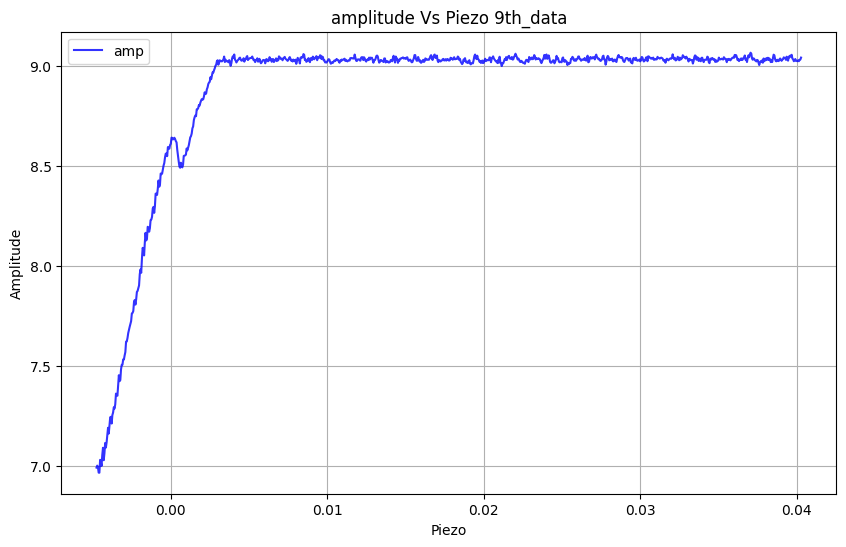

<Figure size 640x480 with 0 Axes>

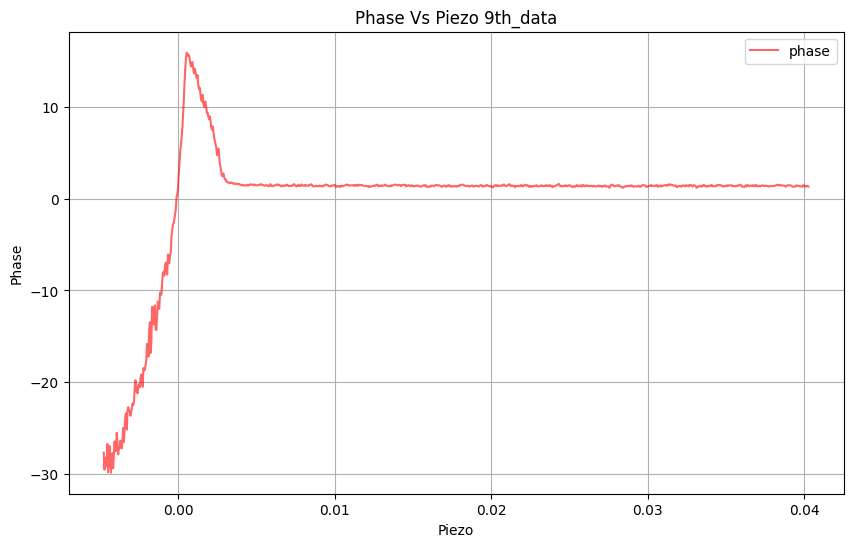

<Figure size 640x480 with 0 Axes>

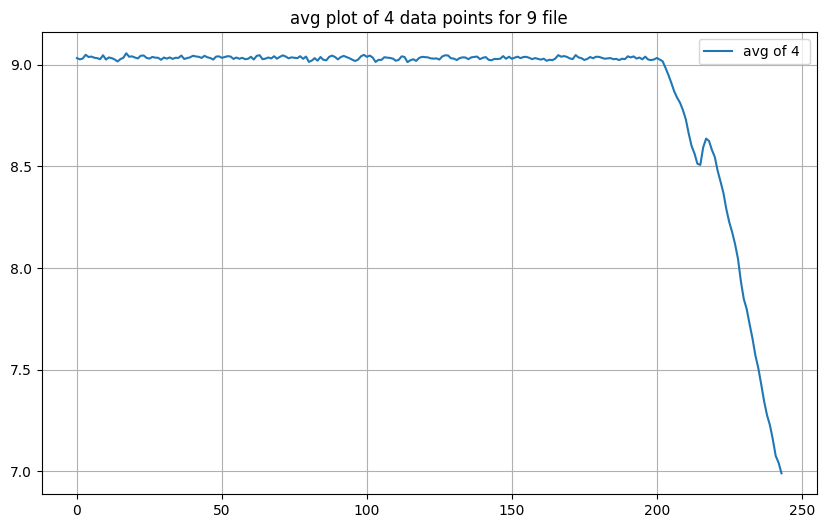

<------------------------!!!!-----------------------------> 8.869143511839999 9.02583339872
please Reduce Average window size i.e. avg_window, keep it less than 10, if you get index = None
index of inflexion point w.r.to the average list(i.e. in list_avg) : 201 <-->
Inflexion index: 201


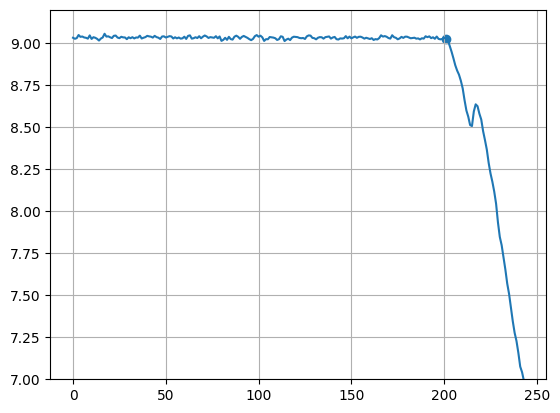

 this the actual index from where we get flat amplitude almost ! -->  177


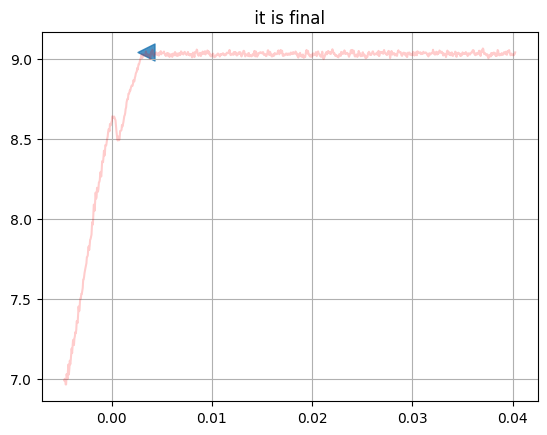

177
0.0034082305470137524
 the shape and size of the amplitude array before the np.diff: (4:dataendpoint) 
 (173,)
x values
 and shape of x  4   -0.004562
5   -0.004516
6   -0.004470
7   -0.004424
8   -0.004378
Name: Piezo, dtype: float64 (173,)
I am indsid ethe array: function arary 
: [ 0.06446888 -0.01106271 -0.0194551   0.05455059  0.0362399  -0.06218004
  0.03471401  0.05149881 -0.02288836  0.02555867]
longest sequence =
 [104 105 106 107 108 109 110 111]
x axis=
 [0.00022922 0.00027529 0.00032136 0.00036743 0.00041351 0.00045958
 0.00050565 0.00055173]
scat val x: 	 
 104
scat val y: 	 
 -0.006866507519999843


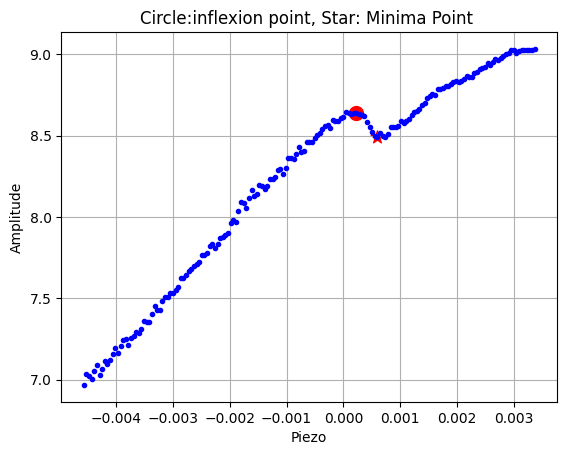


 Actual inflexion point Index with original data :   108  
 Actual Minima point Index before Slicing with original Data :  116 
 inflexion point index after slicing:  104 
 Minima point Index After slicing:  112

 index_inflexion ----------> 108

 index_minima ----------> 116
n count back =  87.0

 index starting wrto inflexion :  21.0 
 index starting wrto Minima :  29.0
m (slope in nA/nm ): for 9 file data 0.37361540327638876
c, zero intercept nA (intercept): for 9 file data 8.675057828698161


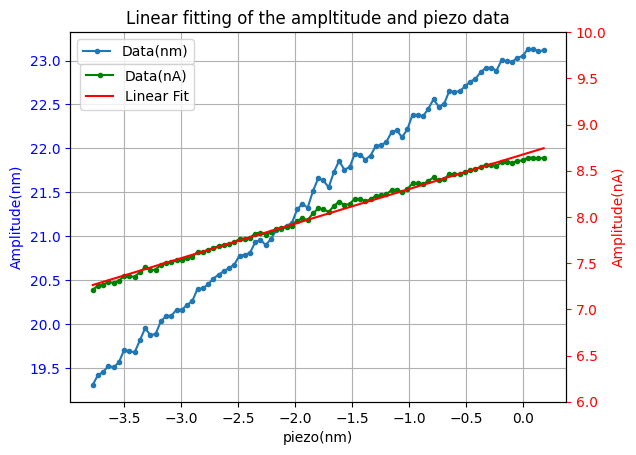

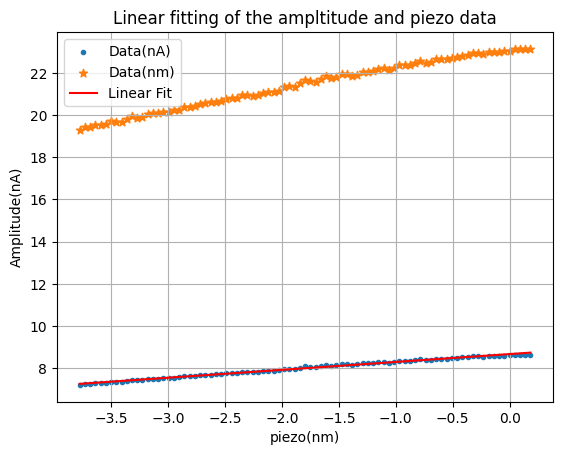

21   -3.779105
22   -3.733032
23   -3.686959
24   -3.640887
25   -3.594814
Name: Piezo, dtype: float64


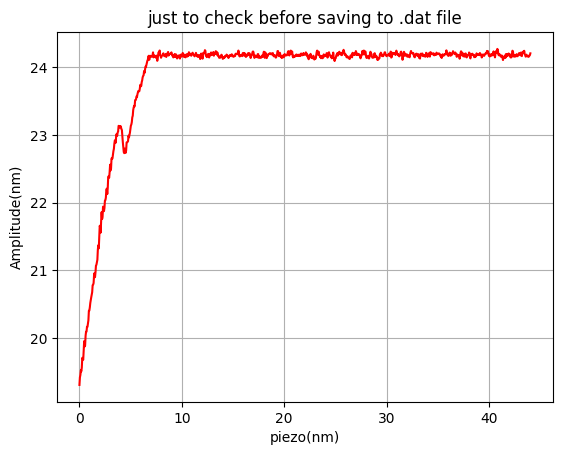

-27.663785416

 (978,)

 new phase values: 
 0   -61.012352
1   -59.150155
2   -60.463031
3   -59.842299
4   -59.540173
Name: Phase, dtype: float64


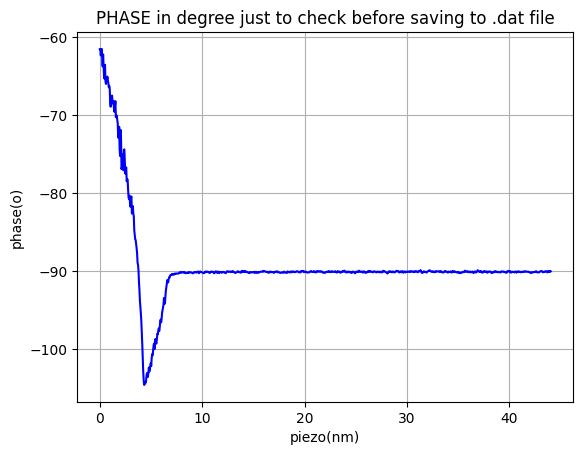

Directory 'processdata\' already exists.

 (957,) 
 (957,) 
 (957,)
Below this is before reverse and scientific notation and deletion: 
            Piezo     Amplitude      Phase
21  0.000000e+00  1.930564e-08 -61.501247
22  4.607266e-11  1.941795e-08 -61.495754
23  9.214532e-11  1.945267e-08 -62.308749
24  1.382180e-10  1.952312e-08 -61.808867
25  1.842906e-10  1.950576e-08 -61.473781
without heading or column index next we will see with index: 
                piezo        amplitude             phase
977  4.404546380E-08  2.420352280E-08  -9.000000000E+01
976  4.399939113E-08  2.417595498E-08  -9.007141168E+01
975  4.395331847E-08  2.417289189E-08  -9.002197282E+01
974  4.390724581E-08  2.415553438E-08  -9.004943885E+01
973  4.386117315E-08  2.416676571E-08  -8.997802718E+01
after final procees:
              piezo        amplitude             phase
0  4.404546380E-08  2.420352280E-08  -9.000000000E+01
1  4.399939113E-08  2.417595498E-08  -9.007141168E+01
2  4.395331847E-08  2.417289

In [1]:
# this is main program start here ------------>


import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.io as sio
import os
from termcolor import colored

from listxlsfilesinOrder import listxlsFiles
from converdfSetAxisgetNumpyArray import readASdfsetaxisAmpasnp
from plotmatlabfun import plot_data
from reverseArrayOfAvgWindow import reverseArrayofAvgValuesWndsize
from detect_inflexiondy_dxZero import detect_inflexion_pointAfterAverage
from final_index_calculation import findActualInflexion
from inflexionMinimadownbump import findDownBump 
from fitselectdataRange1bymfind import find1bymcampdfandfit
from savefiledf2dat import filesaveDatain_dat

data_path =  "dataproblem\\"
amp_inOrder,Phase_inOrder = listxlsFiles(data_path)

for i in range(len(amp_inOrder)):
    filenameAmplitude = amp_inOrder[i]
    filenamephase = Phase_inOrder[i]
    print(f"I am dealing with file = {i+1}.")
#     readASdfsetaxisAmpasnp(data_path,filenameAmplitude,filenamephase)
    print(f"I have read and converted the data in dataframe and numpy array and no of row in amp as data_endamp for file {i+1} named as {filenameAmplitude} and {filenamephase}.")
    res = readASdfsetaxisAmpasnp(data_path,filenameAmplitude,filenamephase)
    ampdf = res[0]
    phasedf = res[1]
    data_endamp = res[2]
    ampdfPiezoColumnarr = res[3]
    ampdfAmplitudeColumnarr = res[4]
    A0 = res[5]

    plt.figure()
    plot_data(ampdf,label='amp',color='blue', marker='', markersize=1,alpha=0.8,title=f"amplitude Vs Piezo {i+1}th_data",Xaxis="Piezo",Yaxis='Amplitude')
    plt.show()
    plt.figure()
    plot_data(phasedf,label='phase',color='red', marker='', markersize=1,alpha=0.6,title=f"Phase Vs Piezo {i+1}th_data",Xaxis="Piezo",Yaxis='Phase')
    plt.show()
    avg_window = 4   #7,4
    list_avg = reverseArrayofAvgValuesWndsize(ampdf,phasedf,avg_window)
    plt.figure()
    plot_data(list_avg,label=f"avg of {avg_window} ",title=f"avg plot of {avg_window} data points for {i+1} file")
    plt.show()
    consecutive_decrease_windowsize = 6   #6,6
    index = detect_inflexion_pointAfterAverage(ampdf,list_avg,consecutive_decrease_windowsize) 
    inflexion_After_avg =  index
    print("index of inflexion point w.r.to the average list(i.e. in list_avg) :",inflexion_After_avg,"<-->")
    
       
    final_Actual_index = findActualInflexion(inflexion_After_avg,list_avg,data_endamp,avg_window,ampdfAmplitudeColumnarr,ampdfPiezoColumnarr)
    zero_orFlatAmp = final_Actual_index
    print(zero_orFlatAmp )
    print(ampdf.iloc[final_Actual_index,0])
    
    # <--------- it is for the finding the downbump in the actual data ... >
    res_indices = findDownBump(ampdf,zero_orFlatAmp)
    index_inflexion = res_indices[0]
    print("\n index_inflexion ---------->",index_inflexion)
    index_minima = res_indices[1]
    print("\n index_minima ---------->",index_minima)
    backward_MinimaBump_nmValue = 4.0
    forward_MinimaBump_nmValue = 10.0
    
#     (ampdata2saveAspiezo_nm,ampdata2saveAsAmplitude_nm,phasedata2savedegree)
    res_m = find1bymcampdfandfit(ampdf,phasedf,backward_MinimaBump_nmValue,forward_MinimaBump_nmValue,res_indices,data_endamp,i,zero_orFlatAmp,part2 =None)
    ampdata2saveAspiezo_nm = res_m[0]
    ampdata2saveAsAmplitude_nm = res_m[1]
    phasedata2savedegree = res_m[2]
    ampfrominflexion2flat_nm = res_m[3]  # < -- use for hamaker constant 
    phasefrominflexion2flat_degree = res_m[4]  # < -- use for hamaker constant
    piezofrominflexion2flat_nm = res_m[5]

    
    fdata_path = "dataproblem\\"
    directory_name = "processdata\\"
    directory_path = os.path.join(fdata_path,directory_name)
    if not os.path.exists(directory_path):
        # If not, create the directory
        os.makedirs(directory_path)
        print(f"Directory '{directory_name}' created successfully.")
    else:
        print(f"Directory '{directory_name}' already exists.")

    filesaveDatain_dat(directory_path,ampdata2saveAspiezo_nm,ampdata2saveAsAmplitude_nm,phasedata2savedegree,filenameAmplitude,filenamephase,hamakerConstant = None,A0 = None)
    
    print("<---------------------------------!file saved and hawmaker constant caluclation  ! ----------------------------------->")
    filesaveDatain_dat(directory_path,piezofrominflexion2flat_nm,ampfrominflexion2flat_nm ,phasefrominflexion2flat_degree,filenameAmplitude,filenamephase,hamakerConstant = 1,A0 = A0)

    



    
    
    
    

In [6]:
print(ampdata2saveAspiezo_nm.shape)
ampfrominflexion2flat_nm.shape
phasefrominflexion2flat_degree.shape
ampdata2saveAsAmplitude_nm.shape

(957,)


(957,)

In [18]:
# import numpy as np 
# xpiezo_nm = 1000*ampdf['Piezo']  # now xpiezo_nm in nm -->  after multiplying by 1000 become in nm 

# x_diff = np.diff(ampdf['Piezo'])

# d_nm = 1000*x_diff[5]   # this is in nanometer now. 

# print("d in nm \t:",d_nm)

# count = 0
# for val in x_diff:
#     # just to check common differences between piezo values.
#     count = count+1
#     print(val)
#     if count ==5:
#         break
        
# plt.plot(list(range(len(x_diff))),x_diff)    
# # plt.ylim([0,10e-19])
# plt.show()

# print("max",max(x_diff)," \n min:",min(x_diff))
#     print()

In [ ]:
backward_MinimaBump_nmValue = 4.0
forward_MinimaBump_nmValue = 10.0

def convertpiezonm(backward_MinimaBump_nmValue,forward_MinimaBump_nmValue)
import numpy as np 
xpiezo_nm = 1000*ampdf['Piezo']  # now xpiezo_nm in nm -->  after multiplying by 1000 become in nm 
x_diff = np.diff(ampdf['Piezo'])
d_nm = 1000*x_diff[5]   # this is in nanometer now. 
# print("d in nm \t:",d_nm)
# count = 0
# for val in x_diff:
#     # just to check common differences between piezo values.
#     count = count+1
#     print(val)
#     if count ==5:
#         break
        
# plt.plot(list(range(len(x_diff))), ampdf['Piezo'])    
# plt.show()
# #     print()


# here 2.5,3nm any value we put get corresponding N 
# backward_MinimaBump_nmValue = 4.0  # <------------- make it as argument in func.
N_count_back = (backward_MinimaBump_nmValue)/(d_nm)  # (using a+(n-1)D)

N_count_back = np.ceil(N_count_back)
print("n count back = ",N_count_back)

desired_nmBackIndexwrtoInflexion = res_indices[0] - N_count_back  # it is from the inflexion point
desired_nmBackIndexwrtoMinima = res_indices[1] - N_count_back  # this is from the minima point
# desired_nmBackIndex

# now time to choose the data 3nm after the minima(bump):
# forward_MinimaBump_nmValue = 10.0     # <------------- make it as argument in func.
N_count_forward = (forward_MinimaBump_nmValue)/(d_nm)  # (using a+(n-1)D)
N_count_forward = np.ceil(N_count_forward)
data_choose_endindex = res_indices[1] + int(N_count_forward)
data_choose_endindex = data_endamp

print("\n index starting wrto inflexion : ",desired_nmBackIndexwrtoInflexion, 
     "\n index starting wrto Minima : ",desired_nmBackIndexwrtoMinima)

desired_nmBackIndexwrtoInflexion = int(desired_nmBackIndexwrtoInflexion)
desired_nmBackIndexwrtoMinima = int(desired_nmBackIndexwrtoMinima)



##### ----------this is for linear fitting the data from desired point to the inflexion points data :-----------##
# Perform linear regression for linear fitting

ampdf_x_nm = 1000*ampdf['Piezo'][desired_nmBackIndexwrtoInflexion:index_inflexion]
ampdf_y_nA = ampdf['Amplitude'][desired_nmBackIndexwrtoInflexion:index_inflexion]

coefficients = np.polyfit(ampdf_x_nm,ampdf_y_nA, 1)

m, c = coefficients
# Print the results
print(f"m (slope in nA/nm ): {m}")
print(f"c, zero intercept nA (intercept): {c}")

ampdf_y_nm = (1/m)*ampdf_y_nA    #--------****** save this data as Amplitude in .dat file----------*********** 

poly = np.poly1d(coefficients)  # this is like f(x) = m*x + c , give x values get y values.

# Plot the data and the linear fit
fig, ax1 = plt.subplots()
ax1.plot(ampdf_x_nm,ampdf_y_nm, marker ='.',label='Data(nm)')
ax1.set_xlabel('piezo(nm)')
ax1.set_ylabel('Amplitude(nm)',color='b')
ax1.tick_params('y', colors='b')  # this will make blue color font on y axis left side.
ax1.grid()
ax1.legend()

ax2= ax1.twinx()  # it will share the x axis --> twinx()
ax2.plot(ampdf_x_nm, ampdf_y_nA, color='green',marker ='.',label='Data(nA)')
ax2.plot(ampdf_x_nm, poly(ampdf_x_nm), color='red', label='Linear Fit') 
ax2.set_xlabel('piezo(nm)')
ax2.set_ylabel('Amplitude(nA)',color='r')
ax2.tick_params('y',colors = 'r')
ax2.set_ylim([6,10])
# ax2.set_grid()
ax2.legend(loc=[0.02,0.79])
plt.title('Linear fitting of the ampltitude and piezo data')
plt.show()


# ************ ------------ this is working fine for me ----------------------******************
# same data but another figure 

fig
plt.scatter(ampdf_x_nm, ampdf_y_nA, marker ='.',label='Data(nA)')

plt.scatter(ampdf_x_nm,ampdf_y_nm, marker ='*',label='Data(nm)') # THIS IS FOR CONVERTED Y DATA TO nm --> y=  y*(1/m)

plt.plot(ampdf_x_nm, poly(ampdf_x_nm), color='red', label='Linear Fit')

plt.grid()
plt.xlabel('piezo(nm)')
plt.ylabel('Amplitude(nA)')
plt.title('Linear fitting of the ampltitude and piezo data')
plt.legend()
plt.show()


# ----------------******************************* this is the final data we will save in .dat file .------------------
ampdata2saveAspiezo_nm = xpiezo_nm[desired_nmBackIndexwrtoInflexion:data_choose_endindex]
print(ampdata2saveAspiezo_nm.head())
# ampdata2saveAspiezo_nm = ampdata2saveAspiezo_nm + c/m
ampdata2saveAspiezo_nm = ampdata2saveAspiezo_nm - ampdata2saveAspiezo_nm[desired_nmBackIndexwrtoInflexion] 

ampdata2saveAsAmplitude_nm = (1/m)* ampdf['Amplitude'][desired_nmBackIndexwrtoInflexion:data_choose_endindex]

ampdata2saveAsAmplitude_nm.shape
plt.plot(ampdata2saveAspiezo_nm,ampdata2saveAsAmplitude_nm,'-r')
plt.grid()
plt.xlabel('piezo(nm)')
plt.ylabel('Amplitude(nm)')
plt.title('just to check before saving to .dat file')
# plt.legend()
plt.show()


# #  this is for the phase values:---------------------------------********


print(phasedf.iloc[0,1]) # first value added -- phasedf.iloc[0,1]
# last value add ---- > phasedf.iloc[data_endamp-1,1] 

phase  = - phasedf['Phase'] -90 + phasedf.iloc[data_endamp-1,1]
print("\n", phase.shape)
print("\n new phase values: \n", phase[0:5])

phasedata2savedegree = phase[desired_nmBackIndexwrtoInflexion:data_choose_endindex]

plt.plot(ampdata2saveAspiezo_nm,phasedata2savedegree,'-b')
plt.grid()
plt.xlabel('piezo(nm)')
plt.ylabel('phase(o)')
plt.title('PHASE in degree just to check before saving to .dat file')
# plt.legend()
plt.show()


# # now generate a .dat file from the where data is saved ( unit: nm)
from termcolor import colored

import pandas as pd
df1 = ampdata2saveAspiezo_nm*1E-9  #  converted to m 
df2 = ampdata2saveAsAmplitude_nm*1E-9 # converted to m 
df3 = phasedata2savedegree  #  in degree 
print("\n",df1.shape,"\n",df2.shape, "\n",df3.shape)
combined_df = pd.concat([df1,df2,df3], axis=1)  
print(colored("Below this is before reverse and scientific notation and deletion: \n",'green', attrs=['bold']),combined_df.head())

# from here start process for 1. delete the first row 2. denote in the scientific notation 3. reverse and add header in combined_df

combined_df = combined_df.iloc[1:]   # 1.

combined_df = combined_df.apply(lambda x: x.apply(lambda y: f'{y:.9E}'))  # 2. Format data in scientific notation

combined_df = combined_df[::-1] # 3.-- Reverse DataFrame

combined_df.columns = ['piezo', 'amplitude', 'phase']   # 3.--- Add headers

print(colored("without heading or column index next we will see with index: \n",'green', attrs=['bold']),combined_df.head())
# Reset index
combined_df.reset_index(drop=True, inplace=True)

print(colored("after final procees:\n",'green', attrs=['bold']),combined_df.head())

# Concatenate the DataFrames vertically
# combined_df = pd.concat([df1,df2,df3], axis=1)
# Save the combined DataFrame to a .dat file


filename = filenameAmplitude.strip('.')[0:-5]+filenamephase.strip('.')[0:-5]+".dat"
combined_df.to_csv(excel_path+filename, sep=' ', index=False, header=True)

print(colored(f" \n HELLO ! <----------  file are saved in .dat format with name:{filename} ---------->  ",'green', attrs=['bold']))

# # Save the combined DataFrame to a .dat file
# combined_df.to_csv('combined_data.dat', sep=' ', index=False)


In [ ]:
# avg_window = 7
# list_avg = reverseArrayofAvgValuesWndsize(ampdf,phasedf,avg_window)

In [ ]:
# # <-------------------- main program is start from here --------------------------------->

# import pandas as pd
# import numpy as np 
# # from inflexionMinimadownbump import findDownBump 
# # excel_path = "C:\\Users\\mrafik\\Desktop\\python_general_code\\xlsfileprocess\\"
# excel_path = "E:\\python_programs\\xlsfileprocess\\dataproblem\\"
# # excel_path = "E:\\python_programs\\xlsfileprocess\\"

# filenameAmplitude = 'Amplitude40.xlsx'
# ampdf = pd.read_excel(excel_path+filenameAmplitude)
# ampdf= ampdf.set_axis(['Piezo','Amplitude'],axis='columns')
# print(ampdf.head(),"\n")
# #  ------------------------- phase -------------------- > 
# filenamephase = 'phase40.xlsx'
# phasedf = pd.read_excel(excel_path+filenamephase)
# phasedf=phasedf.set_axis(['Piezo','Phase'],axis='columns')
# print(phasedf.head(),"\n")
# print(ampdf.shape)
# # x= nm  , y= nA
# # <--------------------------- these two points are used later data_endamp and ampdfPiezoColumn  >
# data_endamp =ampdf.shape[0]
# print("end dat pints = \n",data_endamp)

# ampdfPiezoColumn = np.array(ampdf['Piezo'])
# print()

In [ ]:
import matplotlib.pyplot as plt

plt.subplot(1,2,1)
plt.plot(phasedf['Piezo'],phasedf['Phase'],'-r')
plt.legend('phase')
plt.xlabel('piezo')
plt.ylabel('Phase')
plt.grid() 
plt.subplot(1,2,2)
plt.plot(ampdf['Piezo'],ampdf['Amplitude'],'-b')
plt.legend('amplitude')
plt.xlabel('Piezo')
plt.ylabel('Amplitude')
plt.grid() 
plt.tight_layout()
plt.show()

In [ ]:
# ampdfAmplitudeColumn = np.array(ampdf['Amplitude'])
# rows = ampdfAmplitudeColumn.shape[0]
# type(rows)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
avg_window = 7  # choose any integer depends on the data.  
from reverseArrayOfAvgWindow import reverseArrayofAvgValuesWndsize
# avg_window = 10
list_avg = reverseArrayofAvgValuesWndsize(ampdf,phasedf,avg_window)


In [ ]:
from detect_inflexiondy_dxZero import detect_inflexion_pointAfterAverage

index = detect_inflexion_pointAfterAverage(ampdf,list_avg,consecutive_decrease_windowsize) 
inflexion_After_avg =  index

print("index of inflexion point w.r.to the average list(i.e. - avg_list) :",inflexion_After_avg,"<-->")

In [ ]:
 # plot --> To have a rough idea --- it works or not --->  
inflexion_index_afterAverage   = inflexion_After_avg
y_scatter_indexforavg = list_avg[inflexion_index_afterAverage]
print("Inflexion index:", inflexion_index_afterAverage)
plt.plot(list_avg)
plt.scatter(inflexion_index_afterAverage,y_scatter_indexforavg)
plt.grid()
plt.ylim([7,9.2])
plt.show()



# below I will calculate the actual inflexion point with the original index of the ampdf.
# <---------------- now Calculate the original index for that resversed Array and then conver back that point in Straight array also ----> 
inflexion_index_afterAverage_startZero =  inflexion_index_afterAverage-1
index_Actual_reverseArray = ((inflexion_index_afterAverage_startZero+ 1)* avg_window) - avg_window + 1 
last_index_ampdf = data_endamp # ampdfAmplitudeColumn.shape # <-- num of rows
# print("size of the ampdf[\"Amplitude\"] ", ampdfAmplitudeColumn.shape)
index_Actual_Array = last_index_ampdf - index_Actual_reverseArray + 1
final_Actual_index =  index_Actual_Array -1

print(" this the actual index from where we get flat amplitude almost ! --> ",final_Actual_index)
# main plot and inflexion point w.r.to main data 
y_actual = ampdfAmplitudeColumnarr[final_Actual_index]
x_scatter = ampdfPiezoColumnarr[final_Actual_index] 
# plt.figure
plt.plot(ampdfPiezoColumnarr,ampdfAmplitudeColumnarr,'-r',alpha=0.2)
plt.scatter(x_scatter,y_actual,marker ='<',s=100,alpha=0.8,label='Data(nm)')
plt.title(" it is final ")
plt.grid()
plt.show()


In [9]:
 # plot --> To have a rough idea --- it works or not --->  
def findActualInflexion(inflexion_After_avg,list_avg,data_endamp,avg_window,ampdfAmplitudeColumnarr,ampdfPiezoColumnarr):

    inflexion_index_afterAverage   = inflexion_After_avg
    y_scatter_indexforavg = list_avg[inflexion_index_afterAverage]
    print("Inflexion index:", inflexion_index_afterAverage)
    plt.plot(list_avg)
    plt.scatter(inflexion_index_afterAverage,y_scatter_indexforavg)
    plt.grid()
    plt.ylim([7,9.2])
    plt.show()



    # below I will calculate the actual inflexion point with the original index of the ampdf.
    # <---------------- now Calculate the original index for that resversed Array and then conver back that point in Straight array also ----> 
    inflexion_index_afterAverage_startZero =  inflexion_index_afterAverage-1
    index_Actual_reverseArray = ((inflexion_index_afterAverage_startZero+ 1)* avg_window) - avg_window + 1 
    last_index_ampdf = data_endamp # ampdfAmplitudeColumn.shape # <-- num of rows
    # print("size of the ampdf[\"Amplitude\"] ", ampdfAmplitudeColumn.shape)
    index_Actual_Array = last_index_ampdf - index_Actual_reverseArray + 1
    final_Actual_index =  index_Actual_Array -1

    print(" this the actual index from where we get flat amplitude almost ! --> ",final_Actual_index)
    # main plot and inflexion point w.r.to main data 
    y_actual = ampdfAmplitudeColumnarr[final_Actual_index]
    x_scatter = ampdfPiezoColumnarr[final_Actual_index] 
    # plt.figure
    plt.plot(ampdfPiezoColumnarr,ampdfAmplitudeColumnarr,'-r',alpha=0.2)
    plt.scatter(x_scatter,y_actual,marker ='<',s=150,alpha=0.8,label='Data(nm)')
    plt.title(" it is final ")
    plt.grid()
    plt.show()
    return final_Actual_index

In [10]:
# phasedf.head()
# print(ampdf.head())

In [11]:
# ampdf= ampdf.set_axis(['Piezo','Amplitude'], axis ='columns')
print(ampdf.head())
print("\n ",ampdf.shape)

      Piezo  Amplitude
0 -0.004747   6.992393
1 -0.004701   7.002312
2 -0.004654   6.993919
3 -0.004608   6.967216
4 -0.004562   6.966835

  (978, 2)


In [12]:
phasedf= phasedf.set_axis(['Piezo','Phase'], axis ='columns')
print("\n",phasedf.head(),"\n",phasedf.shape,"\n")
print(phasedf.iloc[0,1])
phase  = - phasedf['Phase'] -90 + phasedf.iloc[0,1]
print("\n", phase.shape)
print("\n new phase values: \n", phase[0:5])


       Piezo      Phase
0 -0.004747 -27.663785
1 -0.004701 -29.525982
2 -0.004654 -28.213106
3 -0.004608 -28.833838
4 -0.004562 -29.135965 
 (978, 2) 

-27.663785416

 (978,)

 new phase values: 
 0   -90.000000
1   -88.137803
2   -89.450679
3   -88.829947
4   -88.527821
Name: Phase, dtype: float64


In [13]:
# import matplotlib.pyplot as plt

# plt.subplot(1,2,1)
# plt.plot(phasedf['Piezo'],phasedf['Phase'],'-r')
# plt.legend('phase')
# # plt.xlabel('piezo')
# plt.ylabel('Phase')
# plt.grid() 
# plt.subplot(1,2,2)
# plt.plot(ampdf['Piezo'],ampdf['Amplitude'],'-b')
# plt.legend('amplitude')
# plt.xlabel('Piezo')
# plt.ylabel('Amplitude')
# plt.grid() 
# plt.tight_layout()
# plt.show()

In [14]:
# import numpy as np
# zero_indices = df.loc[df['Column1'] == 0].index
# Print the indices
# print("Indices where 'Column1' has zero values:", zero_indices)
# indices_zero = ampdf.loc[ampdf['Piezo'] >= 0].index
# print("index of indices_zero: ",indices_zero)
# zero_orFlatAmp = indices_zero[0]   # zero_orFlatAmp --> this will be used in future 
zero_orFlatAmp = final_Actual_index
print(zero_orFlatAmp )
# print(ampdf.iloc[322,0])
print(ampdf.iloc[final_Actual_index,0])

NameError: name 'final_Actual_index' is not defined

In [ ]:
# ampdf
# zero_orFlatAmp
# this is for the bump inflexion and bump minima only. above is for the inflexion in  the vicinity of the flat values.
from inflexionMinimadownbump import findDownBump 
res_indices = findDownBump(ampdf,zero_orFlatAmp)
index_inflexion = res_indices[0]
print("\n index_inflexion ---------->",index_inflexion)
index_minima = res_indices[1]
print("\n index_minima ---------->",index_minima)


In [ ]:
# index_inflexion = res_indices[0]
# print("index_inflexion",index_inflexion)
# index_minima = res_indices[1]
# print("index_minima",index_minima)

In [ ]:
import numpy as np 
xpiezo_nm = 1000*ampdf['Piezo']  # now xpiezo_nm in nm -->  after multiplying by 1000 become in nm 

x_diff = np.diff(ampdf['Piezo'])

d_nm = 1000*x_diff[5]   # this is in nanometer now. 

print("d in nm \t:",d_nm)

count = 0
for val in x_diff:
    # just to check common differences between piezo values.
    count = count+1
    print(val)
    if count ==5:
        break
        
# plt.plot(list(range(len(x_diff))), ampdf['Piezo'])    
# plt.show()
# #     print()

# here 2.5,3nm any value we put get corresponding N 

N_count_back = (4.0)/(d_nm)  # (using a+(n-1)D)

N_count_back = np.ceil(N_count_back)
print("n count back = ",N_count_back)

desired_nmBackIndexwrtoInflexion = res_indices[0] - N_count_back  # it is from the inflexion point

desired_nmBackIndexwrtoMinima = res_indices[1] - N_count_back  # this is from the minima point
# desired_nmBackIndex

# now time to choose the data 3nm after the minima(bump):
N_count_forward = (10.0)/(d_nm)  # (using a+(n-1)D)
N_count_forward = np.ceil(N_count_forward)
data_choose_endindex = res_indices[1] + int(N_count_forward)
data_choose_endindex = data_endamp

print("\n index starting wrto inflexion : ",desired_nmBackIndexwrtoInflexion, 
     "\n index starting wrto Minima : ",desired_nmBackIndexwrtoMinima)

desired_nmBackIndexwrtoInflexion = int(desired_nmBackIndexwrtoInflexion)
desired_nmBackIndexwrtoMinima = int(desired_nmBackIndexwrtoMinima)



##### ----------this is for linear fitting the data from desired point to the inflexion points data :-----------##
# Perform linear regression for linear fitting

ampdf_x_nm = 1000*ampdf['Piezo'][desired_nmBackIndexwrtoInflexion:index_inflexion]
ampdf_y_nA = ampdf['Amplitude'][desired_nmBackIndexwrtoInflexion:index_inflexion]

coefficients = np.polyfit(ampdf_x_nm,ampdf_y_nA, 1)

m, c = coefficients
# Print the results
print(f"m (slope in nA/nm ): {m}")
print(f"c, zero intercept nA (intercept): {c}")

ampdf_y_nm = (1/m)*ampdf_y_nA    #--------****** save this data as Amplitude in .dat file----------*********** 

poly = np.poly1d(coefficients)  # this is like f(x) = m*x + c , give x values get y values.

# Plot the data and the linear fit
fig, ax1 = plt.subplots()
ax1.plot(ampdf_x_nm,ampdf_y_nm, marker ='.',label='Data(nm)')
ax1.set_xlabel('piezo(nm)')
ax1.set_ylabel('Amplitude(nm)',color='b')
ax1.tick_params('y', colors='b')  # this will make blue color font on y axis left side.
ax1.grid()
ax1.legend()

ax2= ax1.twinx()  # it will share the x axis --> twinx()
ax2.plot(ampdf_x_nm, ampdf_y_nA, color='green',marker ='.',label='Data(nA)')
ax2.plot(ampdf_x_nm, poly(ampdf_x_nm), color='red', label='Linear Fit') 
ax2.set_xlabel('piezo(nm)')
ax2.set_ylabel('Amplitude(nA)',color='r')
ax2.tick_params('y',colors = 'r')
ax2.set_ylim([6,10])
# ax2.set_grid()
ax2.legend(loc=[0.02,0.79])
plt.title('Linear fitting of the ampltitude and piezo data')
plt.show()




# ************ ------------ this is working fine for me ----------------------******************
# same data but another figure 
fig
plt.scatter(ampdf_x_nm, ampdf_y_nA, marker ='.',label='Data(nA)')

plt.scatter(ampdf_x_nm,ampdf_y_nm, marker ='*',label='Data(nm)') # THIS IS FOR CONVERTED Y DATA TO nm --> y=  y*(1/m)

plt.plot(ampdf_x_nm, poly(ampdf_x_nm), color='red', label='Linear Fit')

plt.grid()
plt.xlabel('piezo(nm)')
plt.ylabel('Amplitude(nA)')
plt.title('Linear fitting of the ampltitude and piezo data')
plt.legend()
plt.show()


# ----------------******************************* this is the final data we will save in .dat file .------------------
ampdata2saveAspiezo_nm = xpiezo_nm[desired_nmBackIndexwrtoInflexion:data_choose_endindex]
print(ampdata2saveAspiezo_nm.head())
# ampdata2saveAspiezo_nm = ampdata2saveAspiezo_nm + c/m
ampdata2saveAspiezo_nm = ampdata2saveAspiezo_nm - ampdata2saveAspiezo_nm[desired_nmBackIndexwrtoInflexion] 

ampdata2saveAsAmplitude_nm = (1/m)* ampdf['Amplitude'][desired_nmBackIndexwrtoInflexion:data_choose_endindex]

ampdata2saveAsAmplitude_nm.shape
plt.plot(ampdata2saveAspiezo_nm,ampdata2saveAsAmplitude_nm,'-r')
plt.grid()
plt.xlabel('piezo(nm)')
plt.ylabel('Amplitude(nm)')
plt.title('just to check before saving to .dat file')
# plt.legend()
plt.show()


# #  this is for the phase values:---------------------------------********


print(phasedf.iloc[0,1]) # first value added -- phasedf.iloc[0,1]
# last value add ---- > phasedf.iloc[data_endamp-1,1] 

phase  = - phasedf['Phase'] -90 + phasedf.iloc[data_endamp-1,1]
print("\n", phase.shape)
print("\n new phase values: \n", phase[0:5])

phasedata2savedegree = phase[desired_nmBackIndexwrtoInflexion:data_choose_endindex]

plt.plot(ampdata2saveAspiezo_nm,phasedata2savedegree,'-b')
plt.grid()
plt.xlabel('piezo(nm)')
plt.ylabel('phase(o)')
plt.title('PHASE in degree just to check before saving to .dat file')
# plt.legend()
plt.show()


# # now generate a .dat file from the where data is saved ( unit: nm)
from termcolor import colored

import pandas as pd
df1 = ampdata2saveAspiezo_nm*1E-9  #  converted to m 
df2 = ampdata2saveAsAmplitude_nm*1E-9 # converted to m 
df3 = phasedata2savedegree  #  in degree 
print("\n",df1.shape,"\n",df2.shape, "\n",df3.shape)
combined_df = pd.concat([df1,df2,df3], axis=1)  
print(colored("Below this is before reverse and scientific notation and deletion: \n",'green', attrs=['bold']),combined_df.head())

# from here start process for 1. delete the first row 2. denote in the scientific notation 3. reverse and add header in combined_df

combined_df = combined_df.iloc[1:]   # 1.

combined_df = combined_df.apply(lambda x: x.apply(lambda y: f'{y:.9E}'))  # 2. Format data in scientific notation

combined_df = combined_df[::-1] # 3.-- Reverse DataFrame

combined_df.columns = ['piezo', 'amplitude', 'phase']   # 3.--- Add headers

print(colored("without heading or column index next we will see with index: \n",'green', attrs=['bold']),combined_df.head())
# Reset index
combined_df.reset_index(drop=True, inplace=True)

print(colored("after final procees:\n",'green', attrs=['bold']),combined_df.head())

# Concatenate the DataFrames vertically
# combined_df = pd.concat([df1,df2,df3], axis=1)
# Save the combined DataFrame to a .dat file


filename = filenameAmplitude.strip('.')[0:-5]+filenamephase.strip('.')[0:-5]+".dat"
combined_df.to_csv(excel_path+filename, sep=' ', index=False, header=True)

print(colored(f" \n HELLO ! <----------  file are saved in .dat format with name:{filename} ---------->  ",'green', attrs=['bold']))

# # Save the combined DataFrame to a .dat file
# combined_df.to_csv('combined_data.dat', sep=' ', index=False)


In [ ]:
# for i in range(20,26,1):
#     name = f"amplitude{i}.xlsx"
# #     name =filenameAmplitude
#     x=name.strip('.')[0:-5]
# #     print(name.strip('.')[0:-5])
#     print(x)
print(1E-9)

In [ ]:
"""Shift + Enter run the current cell, select below
Ctrl + Enter run selected cells
Alt + Enter run the current cell, insert below
Ctrl + S save and checkpoint"""

import pandas as pd
import numpy as np
import os
import math
from scipy.integrate import quad
import matplotlib.pyplot as plt

excel_path = "E:\\python_programs\\xlsfileprocess\\dataproblem\\"
# excel_path = "C:\\Users\\mrafik\\Desktop\\python_general_code\\xlsfileprocess\\"
# excel_path = "/media/mrafik/Drive/python_programs/xlsfileprocess/"

# excel_path+filename
# here xls file is read
df = pd.read_csv(excel_path+filename,delimiter=' ')
# df = pd.read_excel(
#     '/home/mrafik/Desktop/C_codeAniqa/2023-AM-AFM-Spectroscopy/2023-AM-AFM-Spectroscopy/Spectroscopy/FRAME_20230418.xls',
#     usecols='A:F')
print(" read the .dat file processed \n",df.head(5))

print(" ------------****** Reading of the data excel file is over ------------******\n")
p = df['phase']  # p phase is a vector
A = df['amplitude']         # A --> amplitude
pi = math.pi
c_z = 2.756  # --> it is in N/m spring constant , he was using 40
# c_z = 2.756e-9   # now in N/nm spring constant
fd = 72.7163e3
f0 = 72.7163e3
D_min = min(df['piezo'])
Qfactor = 241
aexc = max(A) / Qfactor 
# aexc = 220e-9/Qfactor

def Kvalue(A_i, P_i):
    """
    call the function in a loop, it will calculate the
    k value for each phase and amplitude value taken from the
    aniqa data.
    """
    k = (0.5) * (((aexc / A_i) * (math.cos((P_i * pi) / 180))) - ((f0 ** 2 - fd ** 2) / f0 ** 2))
    return k


# ********* code for potential U integration ***********
# import numpy as np

def integration(A_i, P_i):
    k = (0.5) * ((aexc / A_i) * (math.cos((P_i * pi) / 180)) - ((f0 ** 2 - fd ** 2) / f0 ** 2))
    
    def u(t):  ## Define the integrand function
        return (4 * c_z * k * (t ** 3 + ((((A_i) * (t ** 2)) / 16 * pi) ** 0.5) + ((((A_i) ** 3) ** 0.5) / ((2) ** 0.5))))
    
    integral_value, error = quad(u, 0.001, 10e12, weight='cauchy', wvar=0)
    
#     integral_value, error = quad(u, 0, np.inf, weight='cauchy', wvar=0)
#     integral_value, error = quad(u, 0, np.inf)   # this is working 1st.
    #  print("The value of the integral and error is:", integral_value,error)
    #     print(integral_value,error)
    return integral_value

print("------------****** Integration is done ------------******\n ")
# ********* code for writing data in the file ***********


#*************** force using k expression.**********

def Force_integrating_K(A_i, P_i):
    def k_exp(zeta = c_z):
        return (0.5) * (((aexc / A_i) * (math.cos((P_i * pi) / 180))) - ((f0 ** 2 - fd ** 2) / f0 ** 2))*(2*zeta)
    integral_value, error = quad(k_exp, D_min, 10, weight='cauchy', wvar=0)
    #     integral_value, error = quad(u, 0, np.inf, weight='cauchy', wvar=0)
#     integral_value, error = quad(u, 1, np.inf)   # this is working 1st.
    #     print("The value of the integral and error is:", integral_value,error)
#     print(integral_value,error)
    return integral_value

# ********* code for writing data in the file ***********

# potential= []
import csv

# Open the CSV file in write mode

filename = "force_potentialkval.csv"
with open(filename, "w", newline="") as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(["piezo", "potential(U)", "Kvalue","integral_usingK"]) 
    # Write the header row
    for i in range(len(p)):           # Write data in each iterative loop
        kval = Kvalue(A[i],p[i])
#         if i<3:
#             print("kval = ",kval)
        integral_U = integration(A[i], p[i])
#         print("after integration argument=",kval)
        Force_usingK = Force_integrating_K(A[i], p[i])
    
        writer.writerow([df['piezo'][i], df['amplitude'][i], integral_U, kval,Force_usingK])
        # Write the iteration and data as a row

print("Data saved in", filename)
csvfile.close()

# df_datoutspec = pd.read_csv(
#     '/home/mrafik/Desktop/C_codeAniqa/2023-AM-AFM-Spectroscopy/2023-AM-AFM-Spectroscopy/Spectroscopy/spec_dataout_aniqadat.csv')
# df_datoutspec = pd.read

df_datoutspec = pd.read_csv('force_potentialkval.csv')

# df_datoutspec = pd.read_csv(
#     '/home/mrafik/Desktop/C_codeAniqa/2023-AM-AFM-Spectroscopy/2023-AM-AFM-Spectroscopy/Spectroscopy/spec_dataout_aniqa.csv')
# df_datoutspec = pd.read_csv("spec_dataout_aniqa.csv")
# df_datoutspec.head(3)
print(f"------------****** data file: {filename} is created and data is read from the written file {filename} for plotting and analysis ------------****** ")
# df_idx = df_datoutspec['potential(U)'].idxmax()

# print("index of max = ",df_idx)
# print("val at max idx = ",iloc.df_datoutspec[df_idx,])

# ********** normalization ***********
# df_U = df_datoutspec['potential(U)']
# df_U =(df_U - df_U.min())/(df_U.max() - df_U.min())

# ********** normalization using std ***********
# df_U = df_datoutspec['potential(U)']
# df_U =(df_U - df_U.mean())/df_U.std()
# # df =(df - df.mean())/df.std()
# df_U


# df_datoutspec['potential(U)'].iloc[df_idx]  # to find the max value at the df_idx index(row)
# df_datoutspec.drop(df_idx,axis =0,inplace =True)
# k = []
# for i in range(len(p)):
# #      k1 = (0.5) * ((aexc / A[i]) * (math.cos((p[i] * pi) / 180)) - ((f0 ** 2 - fd ** 2) / f0 ** 2))
#     val =  Kvalue(A[i],p[i])
#     k.append(val)

# df_datoutspec['potential(U)']

# ********* for plotting the Kvalue and U  ..

# df_plot = pd.read_csv('/home/mrafik/Desktop/C_codeAniqa/2023-AM-AFM-Spectroscopy/2023-AM-AFM-Spectroscopy/Spectroscopy/spec_dataout_aniqa.csv')

fig1 = plt.figure("Figure 1")
# plt.figure(figsize=(4, 3))
plt.plot(df_datoutspec['piezo'],df_datoutspec['Kvalue'], '-b')
plt.xlabel('distance')
plt.ylabel('k value')
plt.title('K VALUES vs NUMBERS')
# plt.ylim([0.0010,0.0035])
plt.show()

print("plotting for k value is done")
# ********* for plotting U  ..

print("------------****** plotting for potential value is going on ..........")

fig2 = plt.figure("Figure 2")
# plt.figure(figsize=(4, 3))
# plt.plot(df_datoutspec['distance(D-A)(nm)'], df_U, '-r')
plt.plot(df_datoutspec['piezo'], df_datoutspec['potential(U)'], '-r')
plt.xlabel('distance(D)')
plt.ylabel('potential')
plt.title('potential vs piezo')

# plt.ylim([0.0010,0.0035])
# plt.xlim([-17.0,-14])
plt.show()

print(" ------------******  plotting for potential value is done ------------****** ")
# this is for the differentiation  for Force calculation *****
print("------------******  differentiation for force is going on ------------****** ")
# Convert dataframes to NumPy arrays

x = df_datoutspec['piezo'].values
# y = df_U.values
y = df_datoutspec['potential(U)']

# Perform numerical differentiation
dy_dx = np.gradient(y, x)

# Create a new dataframe for the differentiation result
differentiation_result = pd.DataFrame({'dy_dx': dy_dx})

# Plot the result
fig3 = plt.figure("Figure 3")
plt.plot(x, dy_dx, '-m')
plt.xlabel('Distance')
plt.ylabel('F = force(i.e. dU/dD)')
plt.title('Force = Numerical Differentiation Result')
# plt.xlim([-17.0,-16.4])
plt.show()


# ************** FORCE PLOTTED using K ********************

plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True

# plt.plot(df_datoutspec['piezo'].sort_values(),df_datoutspec['integral_usingK'] , '. m')
# plt.plot(df_datoutspec['piezo'].sort_values(),df_datoutspec['integral_usingK'] , '. m')
plt.plot(df_datoutspec['piezo']*(1.0e9),df_datoutspec['integral_usingK'] , '.-m')
# plt.plot(df_datoutspec['integral_usingK'] , '-sm')
# plt.tight_layout
# plt.xlim([0.7e-8,1.4e-8]) # if Force plot is w.r.to Distance. 
# plt.xlim([10,30])  # if Force plot is without any Distance, just raw plot 
ll =  list(range(len(df['piezo'])))
xx=np.zeros(len(ll))

plt.plot(df_datoutspec['piezo']*(1.0e9),xx,'y-.')
# plt.tight_layout()
plt.xlabel('Distance(nm)')
plt.ylabel('F = force(i.e. dU/dD)')
plt.xlim([min(df_datoutspec['piezo']*(1.0e9)),max(df_datoutspec['piezo']*(1.0e9))]) # if Force plot is w.r.to Distance. 
plt.title('Force = Numerical Differentiation Result')

plt.show()

print("------------ program is executed ------------ ")

In [ ]:
# # # import pandas as pd
# # # dfx = pd.DataFrame(x)
# # # print("\n",dfx)
# # dfx = dfx[1:,0]
# # print("\n",dfx)
# # dfx = dfx[::-1]
# # print("\n",dfx)
# # # new_header = ['piezo','amplitude', 'phase']

# import pandas as pd

# # Sample DataFrame
# data = {
#     'piezo': [100.123456, 200.234567, 300.345678],
#     'Amplitude': [0.000123, 0.000234, 0.000345],
#     'phase': [10.123, 20.234, 30.345]
# }
# df = pd.DataFrame(data)

# # Delete first row
# df = df.iloc[1:]

# # Format data in scientific notation
# df = df.apply(lambda x: x.apply(lambda y: f'{y:.6E}'))

# # Reverse DataFrame
# df = df[::-1]

# # Add headers
# df.columns = ['piezo', 'Amplitude', 'phase']

# # Reset index
# df.reset_index(drop=True, inplace=True)

# print(df)



In [ ]:
# ##-------------*********************-this is another methode without triming from the left.*************

# import numpy as np 
# xpiezo_nm = 1000*ampdf['Piezo']  # now xpiezo_nm in nm -->  after multiplying by 1000 become in nm 

# x_diff = np.diff(ampdf['Piezo'])
# d_nm = 1000*x_diff[8]   # this is in nanometer now. common difference.
# print("d in nm \t:",d_nm)

# # count = 0
# # for val in x_diff:
# #     # just to check common differences between piezo values.
# #     count = count+1
# #     print(val)
# #     if count ==5:
# #         break
        
# # plt.plot(list(range(len(x_diff))), ampdf['Piezo'])    
# # plt.show()
# # #     print()

# # here 2.5,3nm any value we put get corresponding N 

# # N_count_back = (4.0)/(d_nm)  #(using a+(n-1)D)

# # N_count_back = np.ceil(N_count_back)
# # print("n count back = ",N_count_back)

# # desired_nmBackIndexwrtoInflexion = res_indices[0] - N_count_back  # it is from the inflexion point

# # desired_nmBackIndexwrtoMinima = res_indices[1] - N_count_back  # this is from the minima point
# # # desired_nmBackIndex

# # now time to choose the data 3nm after the minima(bump):
# N_count_forward = (10.0)/(d_nm)  # (using a+(n-1)D)
# N_count_forward = np.ceil(N_count_forward)
# data_choose_endindex = res_indices[1] + int(N_count_forward)


# # print("\n index starting wrto inflexion : ",desired_nmBackIndexwrtoInflexion, 
# #      "\n index starting wrto Minima : ",desired_nmBackIndexwrtoMinima)

# # desired_nmBackIndexwrtoInflexion = int(desired_nmBackIndexwrtoInflexion)
# # desired_nmBackIndexwrtoMinima = int(desired_nmBackIndexwrtoMinima)



# ##### ----------this is for linear fitting the data from desired point to the inflexion points data :-----------##
# # Perform linear regression for linear fitting
# start_slice = 5
# ampdf_x_nm = 1000*ampdf['Piezo'][start_slice:index_inflexion]
# ampdf_y_nA = ampdf['Amplitude'][start_slice:index_inflexion]

# coefficients = np.polyfit(ampdf_x_nm,ampdf_y_nA, 1)

# m, c = coefficients
# # Print the results
# print(f"m (slope in nA/nm ): {m}")
# print(f"c, zero intercept nA (intercept): {c}")

# ampdf_y_nm = (1/m)*ampdf_y_nA    #--------****** save this data as Amplitude in .dat file----------*********** 

# poly = np.poly1d(coefficients)  # this is like f(x) = m*x + c , give x values get y values.

# # Plot the data and the linear fit
# fig, ax1 = plt.subplots()
# ax1.plot(ampdf_x_nm,ampdf_y_nm, marker ='.',label='Data(nm)')
# ax1.set_xlabel('piezo(nm)')
# ax1.set_ylabel('Amplitude(nm)',color='b')
# ax1.tick_params('y', colors='b')  # this will make blue color font on y axis left side.
# ax1.grid()
# ax1.legend()

# ax2= ax1.twinx()  # it will share the x axis --> twinx()
# ax2.plot(ampdf_x_nm, ampdf_y_nA, color='green',marker ='.',label='Data(nA)')
# ax2.plot(ampdf_x_nm, poly(ampdf_x_nm), color='red', label='Linear Fit') 
# ax2.set_xlabel('piezo(nm)')
# ax2.set_ylabel('Amplitude(nA)',color='r')
# ax2.tick_params('y',colors = 'r')
# ax2.set_ylim([6,10])
# # ax2.set_grid()
# ax2.legend(loc=[0.02,0.79])
# plt.title('Linear fitting of the ampltitude and piezo data')
# plt.show()




# # ************ ------------ this is working fine for me ----------------------******************
# # same data but another figure 
# fig
# plt.scatter(ampdf_x_nm, ampdf_y_nA, marker ='.',label='Data(nA)')

# plt.scatter(ampdf_x_nm,ampdf_y_nm, marker ='*',label='Data(nm)') # THIS IS FOR CONVERTED Y DATA TO nm --> y=  y*(1/m)

# plt.plot(ampdf_x_nm, poly(ampdf_x_nm), color='red', label='Linear Fit')

# plt.grid()
# plt.xlabel('piezo(nm)')
# plt.ylabel('Amplitude(nA)')
# plt.title('Linear fitting of the ampltitude and piezo data')
# plt.legend()
# plt.show()


# # ************************** this is the finsl data we will save in .dat file .------------------
# ampdata2saveAspiezo_nm = xpiezo_nm[start_slice:data_choose_endindex]
# # ampdata2saveAspiezo_nm.shape
# # print(ampdata2saveAspiezo_nm.head())
# # ampdata2saveAspiezo_nm = ampdata2saveAspiezo_nm + c/m
# ampdata2saveAspiezo_nm = ampdata2saveAspiezo_nm - ampdata2saveAspiezo_nm[start_slice]
# # print(ampdata2saveAspiezo_nm.head())
# ampdata2saveAsAmplitude_nm = (1/m)* ampdf['Amplitude'][start_slice:data_choose_endindex]
# print(" size of the data \n",ampdata2saveAsAmplitude_nm.shape)



# plt.plot(ampdata2saveAspiezo_nm,ampdata2saveAsAmplitude_nm,'-r')
# plt.grid()
# plt.xlabel('piezo(nm)')
# plt.ylabel('Amplitude(nm)')
# plt.title('just to check before saving to .dat file')
# # plt.legend()
# plt.show()


# #  this is for the phase values:---------------------------------********


# print(phasedf.iloc[0,1])
# phase  = - phasedf['Phase'] -90 + phasedf.iloc[0,1]
# print("\n", phase.shape)
# print("\n new phase values: \n", phase[0:5])

# phasedata2savedegree = phase[start_slice:data_choose_endindex]

# plt.plot(ampdata2saveAspiezo_nm,phasedata2savedegree,'-b')
# plt.grid()
# plt.xlabel('piezo(nm)')
# plt.ylabel('phase(o)')
# plt.title('PHASE in degree just to check before saving to .dat file')
# # plt.legend()
# plt.show()


# # now generate a .dat file from the where data is saved ( unit: nm)

# import pandas as pd
# df1 = ampdata2saveAspiezo_nm
# df2 = ampdata2saveAsAmplitude_nm
# df3 = phasedata2savedegree
# print("\n",df1.shape,"\n",df2.shape, "\n",df3.shape)
# # Concatenate the DataFrames vertically
# combined_df = pd.concat([df1,df2,df3], axis=1)
# # Save the combined DataFrame to a .dat file
# combined_df.to_csv(excel_path+'finalcombined_data.dat', sep=' ', index=False, header=False)



# # # Save the combined DataFrame to a .dat file
# # combined_df.to_csv('combined_data.dat', sep=' ', index=False)


    #                  <------------------- project is ended ------------------->